In [2]:
import oggm
from oggm import cfg, workflow, tasks, graphics, utils 
from oggm.core.models.flowline import FluxBasedModel
from oggm.core.models.massbalance import ConstantMassBalanceModel, PastMassBalanceModel
import geopandas as gpd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import xarray as xr
import shapely.geometry as shpg
plt.rcParams['figure.figsize'] = (8,8)

In [24]:
glacier_num = 1

In [5]:
cfg.initialize()
cfg.PARAMS['continue_on_error'] = True

2017-07-20 15:32:40: oggm.cfg: Parameter file: /home/david/oggm/oggm/params.cfg


In [6]:
utils.get_wgms_files()
utils.get_glathida_file()
utils.get_rgi_dir()

'/home/david/OGGM/rgi/RGIV5'

In [7]:
entity = gpd.GeoDataFrame.from_file('/home/david/OGGM/rgi/RGIV5/06_rgi50_Iceland/06_rgi50_Iceland.shp')

In [8]:
entity

,Area,Aspect,BgnDate,CenLat,CenLon,EndDate,GLIMSId,GlacType,Lmax,Name,O1Region,O2Region,RGIFlag,RGIId,Slope,Zmax,Zmed,Zmin,geometry
0,4.903,339,20020928,64.8174,-23.7852,20020928,G336215E64817N,0099,3412,À,6,0,0909,RGI50-06.00001,15.0,1406,900,624,"POLYGON ((-23.759735989 64.82046201100002, -23..."
1,1.897,134,20020928,64.7951,-23.7686,20020928,G336231E64795N,1099,1823,À,6,0,0909,RGI50-06.00002,17.7,1394,1132,750,"POLYGON ((-23.749692765 64.794899657, -23.7498..."
2,0.751,269,20020928,64.7979,-23.8043,20020928,G336196E64798N,0099,1244,À,6,0,0909,RGI50-06.00003,22.8,1410,1093,827,"POLYGON ((-23.785733547 64.799140263, -23.7864..."
3,0.067,257,20020928,64.8036,-23.8210,-9999999,G336179E64804N,0099,334,À,6,0,0909,RGI50-06.00004,17.8,950,877,830,"POLYGON ((-23.818028788 64.80468219000001, -23..."
4,0.978,319,20020928,64.8046,-23.7993,20020928,G336201E64805N,0099,1960,À,6,0,0909,RGI50-06.00005,16.1,1406,1140,923,POLYGON ((-23.77991730999999 64.80141159999999...
5,0.912,106,20020928,64.8003,-23.7530,20020928,G336247E64800N,0099,2009,À,6,0,0909,RGI50-06.00006,17.3,1339,1044,765,"POLYGON ((-23.758258643 64.804338427, -23.7582..."
6,2.712,71,20020928,64.8116,-23.7522,20020928,G336248E64812N,0099,2423,À,6,0,0909,RGI50-06.00007,15.7,1325,961,698,"POLYGON ((-23.758258643 64.804338427, -23.7596..."
7,2.166,44,20009999,65.4045,-18.5420,-9999999,G341458E65405N,0099,1995,À,6,0,0909,RGI50-06.00008,13.6,1218,1072,914,"POLYGON ((-18.543805135 65.406850675, -18.5422..."
8,0.448,73,20009999,65.6388,-18.3031,-9999999,G341697E65639N,0099,902,À,6,0,0909,RGI50-06.00009,19.2,1420,1249,1122,"POLYGON ((-18.294609512 65.636673968, -18.2946..."
9,1.000,9,20009999,65.6495,-18.2939,-9999999,G341706E65650N,0099,1503,À,6,0,0909,RGI50-06.00010,15.2,1347,1171,1061,"POLYGON ((-18.297313187 65.642731208, -18.2975..."


In [9]:
gdirs = oggm.workflow.init_glacier_regions(entity)

2017-07-20 15:35:33: oggm.workflow: Multiprocessing: using all available processors (N=12)
2017-07-20 15:35:34: oggm.core.preprocessing.gis: RGI50-06.00003: define_glacier_region
2017-07-20 15:35:34: oggm.core.preprocessing.gis: RGI50-06.00001: define_glacier_region
2017-07-20 15:35:34: oggm.core.preprocessing.gis: RGI50-06.00006: define_glacier_region
2017-07-20 15:35:34: oggm.core.preprocessing.gis: RGI50-06.00005: define_glacier_region
2017-07-20 15:35:34: oggm.core.preprocessing.gis: RGI50-06.00008: define_glacier_region
2017-07-20 15:35:34: oggm.core.preprocessing.gis: RGI50-06.00002: define_glacier_region
2017-07-20 15:35:34: oggm.core.preprocessing.gis: RGI50-06.00004: define_glacier_region
2017-07-20 15:35:34: oggm.core.preprocessing.gis: RGI50-06.00010: define_glacier_region
2017-07-20 15:35:34: oggm.core.preprocessing.gis: RGI50-06.00009: define_glacier_region
2017-07-20 15:35:34: oggm.core.preprocessing.gis: RGI50-06.00007: define_glacier_region
2017-07-20 15:35:34: oggm.cor

2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00093: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00094: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00091: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00097: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00092: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00095: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00099: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00098: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00100: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00101: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00102: define_glacier_region
2017-07-20 15:37:53: oggm.core.p

2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00188: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00189: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00180: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00186: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00191: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00187: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00190: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00192: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00193: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00194: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00195: define_glacier_region
2017-07-20 15:37:53: oggm.core.p

2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00280: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00277: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00281: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00282: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00283: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00285: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00286: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00284: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00290: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00289: define_glacier_region
2017-07-20 15:37:53: oggm.core.preprocessing.gis: RGI50-06.00288: define_glacier_region
2017-07-20 15:37:53: oggm.core.p

2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00374: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00373: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00375: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00376: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00377: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00379: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00380: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00381: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00383: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00384: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00382: define_glacier_region
2017-07-20 15:37:54: oggm.core.p

2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00467: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00469: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00470: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00471: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00473: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00472: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00466: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00474: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00475: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00477: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00478: define_glacier_region
2017-07-20 15:37:54: oggm.core.p

2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00564: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00565: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00562: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00558: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00566: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00567: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00568: define_glacier_region
2017-07-20 15:37:54: oggm.core.preprocessing.gis: RGI50-06.00557: define_glacier_region
2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-06.00002: glacier_masks
2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-06.00001: glacier_masks
2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-06.00006: glacier_masks
2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-

2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-06.00095: glacier_masks
2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-06.00096: glacier_masks
2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-06.00097: glacier_masks
2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-06.00099: glacier_masks
2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-06.00098: glacier_masks
2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-06.00101: glacier_masks
2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-06.00100: glacier_masks
2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-06.00104: glacier_masks
2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-06.00105: glacier_masks
2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-06.00106: glacier_masks
2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-06.00102: glacier_masks
2017-07-20 15:40:01: oggm.core.preprocessing.gis: RGI50-06.00103: glacier_masks
2017-07-20 15:40:01: oggm.core.preproces

2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00198: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00200: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00203: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00204: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00205: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00199: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00202: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00207: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00201: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00206: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00209: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00210: glacier_masks
2017-07-20 15:40:02: oggm.core.preproces

2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00301: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00302: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00303: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00304: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00305: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00307: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00306: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00309: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00310: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00308: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00311: glacier_masks
2017-07-20 15:40:02: oggm.core.preprocessing.gis: RGI50-06.00312: glacier_masks
2017-07-20 15:40:03: oggm.core.preproces

2017-07-20 15:40:03: oggm.core.preprocessing.gis: RGI50-06.00405: glacier_masks
2017-07-20 15:40:03: oggm.core.preprocessing.gis: RGI50-06.00404: glacier_masks
2017-07-20 15:40:03: oggm.core.preprocessing.gis: RGI50-06.00406: glacier_masks
2017-07-20 15:40:03: oggm.core.preprocessing.gis: RGI50-06.00409: glacier_masks
2017-07-20 15:40:03: oggm.core.preprocessing.gis: RGI50-06.00410: glacier_masks
2017-07-20 15:40:03: oggm.core.preprocessing.gis: RGI50-06.00411: glacier_masks
2017-07-20 15:40:03: oggm.core.preprocessing.gis: RGI50-06.00407: glacier_masks
2017-07-20 15:40:03: oggm.core.preprocessing.gis: RGI50-06.00408: glacier_masks
2017-07-20 15:40:03: oggm.core.preprocessing.gis: RGI50-06.00413: glacier_masks
2017-07-20 15:40:03: oggm.core.preprocessing.gis: RGI50-06.00412: glacier_masks
2017-07-20 15:40:03: oggm.core.preprocessing.gis: RGI50-06.00415: glacier_masks
2017-07-20 15:40:03: oggm.core.preprocessing.gis: RGI50-06.00416: glacier_masks
2017-07-20 15:40:03: oggm.core.preproces

2017-07-20 15:40:04: oggm.core.preprocessing.gis: RGI50-06.00509: glacier_masks
2017-07-20 15:40:04: oggm.core.preprocessing.gis: RGI50-06.00508: glacier_masks
2017-07-20 15:40:04: oggm.core.preprocessing.gis: RGI50-06.00510: glacier_masks
2017-07-20 15:40:04: oggm.core.preprocessing.gis: RGI50-06.00506: glacier_masks
2017-07-20 15:40:04: oggm.core.preprocessing.gis: RGI50-06.00512: glacier_masks
2017-07-20 15:40:04: oggm.core.preprocessing.gis: RGI50-06.00511: glacier_masks
2017-07-20 15:40:04: oggm.core.preprocessing.gis: RGI50-06.00513: glacier_masks
2017-07-20 15:40:04: oggm.core.preprocessing.gis: RGI50-06.00515: glacier_masks
2017-07-20 15:40:04: oggm.core.preprocessing.gis: RGI50-06.00516: glacier_masks
2017-07-20 15:40:04: oggm.core.preprocessing.gis: RGI50-06.00517: glacier_masks
2017-07-20 15:40:04: oggm.core.preprocessing.gis: RGI50-06.00518: glacier_masks
2017-07-20 15:40:04: oggm.core.preprocessing.gis: RGI50-06.00514: glacier_masks
2017-07-20 15:40:04: oggm.core.preproces

2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00039: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00043: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00044: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00045: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00046: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00047: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00050: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00051: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00052: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00048: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00049: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00054: glacier_masks
2017-07-20 15:41:00: oggm.core.preproces

2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00143: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00146: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00147: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00148: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00150: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00149: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00152: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00151: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00154: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00155: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00156: glacier_masks
2017-07-20 15:41:00: oggm.core.preprocessing.gis: RGI50-06.00158: glacier_masks
2017-07-20 15:41:00: oggm.core.preproces

2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00249: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00245: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00250: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00252: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00251: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00253: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00254: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00257: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00255: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00258: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00259: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00261: glacier_masks
2017-07-20 15:41:01: oggm.core.preproces

2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00351: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00352: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00354: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00355: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00357: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00356: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00358: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00353: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00359: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00361: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00363: glacier_masks
2017-07-20 15:41:01: oggm.core.preprocessing.gis: RGI50-06.00362: glacier_masks
2017-07-20 15:41:01: oggm.core.preproces

2017-07-20 15:41:02: oggm.core.preprocessing.gis: RGI50-06.00456: glacier_masks
2017-07-20 15:41:02: oggm.core.preprocessing.gis: RGI50-06.00454: glacier_masks
2017-07-20 15:41:02: oggm.core.preprocessing.gis: RGI50-06.00453: glacier_masks
2017-07-20 15:41:02: oggm.core.preprocessing.gis: RGI50-06.00457: glacier_masks
2017-07-20 15:41:02: oggm.core.preprocessing.gis: RGI50-06.00460: glacier_masks
2017-07-20 15:41:02: oggm.core.preprocessing.gis: RGI50-06.00458: glacier_masks
2017-07-20 15:41:02: oggm.core.preprocessing.gis: RGI50-06.00459: glacier_masks
2017-07-20 15:41:02: oggm.core.preprocessing.gis: RGI50-06.00462: glacier_masks
2017-07-20 15:41:02: oggm.core.preprocessing.gis: RGI50-06.00461: glacier_masks
2017-07-20 15:41:02: oggm.core.preprocessing.gis: RGI50-06.00463: glacier_masks
2017-07-20 15:41:02: oggm.core.preprocessing.gis: RGI50-06.00465: glacier_masks
2017-07-20 15:41:02: oggm.core.preprocessing.gis: RGI50-06.00466: glacier_masks
2017-07-20 15:41:02: oggm.core.preproces

2017-07-20 15:41:03: oggm.core.preprocessing.gis: RGI50-06.00553: glacier_masks
2017-07-20 15:41:03: oggm.core.preprocessing.gis: RGI50-06.00558: glacier_masks
2017-07-20 15:41:03: oggm.core.preprocessing.gis: RGI50-06.00559: glacier_masks
2017-07-20 15:41:03: oggm.core.preprocessing.gis: RGI50-06.00562: glacier_masks
2017-07-20 15:41:03: oggm.core.preprocessing.gis: RGI50-06.00560: glacier_masks
2017-07-20 15:41:03: oggm.core.preprocessing.gis: RGI50-06.00561: glacier_masks
2017-07-20 15:41:03: oggm.core.preprocessing.gis: RGI50-06.00563: glacier_masks
2017-07-20 15:41:03: oggm.core.preprocessing.gis: RGI50-06.00564: glacier_masks
2017-07-20 15:41:03: oggm.core.preprocessing.gis: RGI50-06.00565: glacier_masks
2017-07-20 15:41:03: oggm.core.preprocessing.gis: RGI50-06.00566: glacier_masks
2017-07-20 15:41:03: oggm.core.preprocessing.gis: RGI50-06.00568: glacier_masks
2017-07-20 15:41:03: oggm.core.preprocessing.gis: RGI50-06.00567: glacier_masks
2017-07-20 15:41:03: oggm.core.preproces

2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00072: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00074: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00071: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00070: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00076: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00079: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00075: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00077: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00078: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-

2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00152: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00151: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00150: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00153: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00159: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00158: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00160: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00157: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-06.00161: compute_centerlines, divide 1
2017-07-20 15:41:03: oggm.core.preprocessing.centerlines: RGI50-

2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00229: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00230: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00231: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00232: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00233: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00234: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00236: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00237: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00235: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-

2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00304: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00308: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00311: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00312: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00313: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00310: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00315: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00316: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00317: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-

2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00388: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00383: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00389: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00390: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00392: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00393: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00391: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00396: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00395: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-

2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00469: compute_centerlines, divide 1
2017-07-20 15:41:04: oggm.core.preprocessing.centerlines: RGI50-06.00462: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00467: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00468: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00470: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00471: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00472: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00473: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00474: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-

2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00540: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00547: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00548: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00549: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00546: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00551: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00550: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00554: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-06.00553: compute_centerlines, divide 1
2017-07-20 15:41:05: oggm.core.preprocessing.centerlines: RGI50-

2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00060: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00059: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00063: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00061: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00062: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00065: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00064: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00066: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00068: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00070: compute_downstream_lines
2017-07-20

2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00143: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00140: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00146: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00148: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00147: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00144: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00149: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00151: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00145: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00152: compute_downstream_lines
2017-07-20

2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00225: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00226: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00227: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00228: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00229: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00230: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00231: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00232: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00234: compute_downstream_lines
2017-07-20 15:41:06: oggm.core.preprocessing.centerlines: RGI50-06.00236: compute_downstream_lines
2017-07-20

2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00309: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00310: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00311: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00304: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00312: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00313: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00315: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00316: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00317: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00314: compute_downstream_lines
2017-07-20

2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00392: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00393: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00394: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00395: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00397: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00399: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00400: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00390: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00396: compute_downstream_lines
2017-07-20 15:41:07: oggm.core.preprocessing.centerlines: RGI50-06.00401: compute_downstream_lines
2017-07-20

2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00474: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00475: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00477: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00476: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00479: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00480: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00478: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00481: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00482: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00483: compute_downstream_lines
2017-07-20

2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00557: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00560: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00558: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00559: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00561: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00562: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00563: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00564: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00565: compute_downstream_lines
2017-07-20 15:41:08: oggm.core.preprocessing.centerlines: RGI50-06.00566: compute_downstream_lines
2017-07-20

2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00035: initialize_flowlines, divide 0
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00031: initialize_flowlines, divide 0
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00039: initialize_flowlines, divide 1
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00025: initialize_flowlines, divide 0
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00037: initialize_flowlines, divide 0
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00036: initialize_flowlines, divide 0
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00038: initialize_flowlines, divide 0
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00027: initialize_flowlines, divide 0
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00040: initialize_flowlines, divide 1
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00041: initialize_

2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00077: initialize_flowlines, divide 1
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00067: initialize_flowlines, divide 0
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00076: initialize_flowlines, divide 0
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00074: initialize_flowlines, divide 0
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00080: initialize_flowlines, divide 1
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00079: initialize_flowlines, divide 1
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00078: initialize_flowlines, divide 0
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00082: initialize_flowlines, divide 1
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00080: initialize_flowlines, divide 0
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00077: initialize_

2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00119: initialize_flowlines, divide 1
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00118: initialize_flowlines, divide 1
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00116: initialize_flowlines, divide 0
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00117: initialize_flowlines, divide 0
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00122: initialize_flowlines, divide 1
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00120: initialize_flowlines, divide 1
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00123: initialize_flowlines, divide 1
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00121: initialize_flowlines, divide 1
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00115: initialize_flowlines, divide 0
2017-07-20 15:41:09: oggm.core.preprocessing.geometry: RGI50-06.00124: initialize_

2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00157: initialize_flowlines, divide 1
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00156: initialize_flowlines, divide 0
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00154: initialize_flowlines, divide 0
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00159: initialize_flowlines, divide 1
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00162: initialize_flowlines, divide 1
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00161: initialize_flowlines, divide 1
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00163: initialize_flowlines, divide 1
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00158: initialize_flowlines, divide 0
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00162: initialize_flowlines, divide 0
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00160: initialize_

2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00199: initialize_flowlines, divide 1
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00193: initialize_flowlines, divide 0
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00198: initialize_flowlines, divide 0
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00202: initialize_flowlines, divide 1
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00201: initialize_flowlines, divide 1
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00190: initialize_flowlines, divide 0
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00203: initialize_flowlines, divide 1
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00197: initialize_flowlines, divide 0
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00205: initialize_flowlines, divide 1
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00204: initialize_

2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00232: initialize_flowlines, divide 0
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00228: initialize_flowlines, divide 0
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00238: initialize_flowlines, divide 0
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00241: initialize_flowlines, divide 1
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00237: initialize_flowlines, divide 0
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00242: initialize_flowlines, divide 1
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00240: initialize_flowlines, divide 0
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00236: initialize_flowlines, divide 0
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00243: initialize_flowlines, divide 1
2017-07-20 15:41:10: oggm.core.preprocessing.geometry: RGI50-06.00241: initialize_

2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00281: initialize_flowlines, divide 1
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00275: initialize_flowlines, divide 0
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00277: initialize_flowlines, divide 0
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00282: initialize_flowlines, divide 1
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00279: initialize_flowlines, divide 0
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00283: initialize_flowlines, divide 1
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00284: initialize_flowlines, divide 1
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00285: initialize_flowlines, divide 1
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00278: initialize_flowlines, divide 0
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00280: initialize_

2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00320: initialize_flowlines, divide 1
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00321: initialize_flowlines, divide 1
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00322: initialize_flowlines, divide 1
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00319: initialize_flowlines, divide 0
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00323: initialize_flowlines, divide 1
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00324: initialize_flowlines, divide 1
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00326: initialize_flowlines, divide 1
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00320: initialize_flowlines, divide 0
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00325: initialize_flowlines, divide 1
2017-07-20 15:41:11: oggm.core.preprocessing.geometry: RGI50-06.00317: initialize_

2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00362: initialize_flowlines, divide 1
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00358: initialize_flowlines, divide 0
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00363: initialize_flowlines, divide 1
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00364: initialize_flowlines, divide 1
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00360: initialize_flowlines, divide 0
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00361: initialize_flowlines, divide 0
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00357: initialize_flowlines, divide 0
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00363: initialize_flowlines, divide 0
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00365: initialize_flowlines, divide 1
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00366: initialize_

2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00400: initialize_flowlines, divide 1
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00401: initialize_flowlines, divide 1
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00402: initialize_flowlines, divide 1
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00399: initialize_flowlines, divide 0
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00403: initialize_flowlines, divide 1
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00404: initialize_flowlines, divide 1
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00405: initialize_flowlines, divide 1
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00406: initialize_flowlines, divide 1
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00400: initialize_flowlines, divide 0
2017-07-20 15:41:12: oggm.core.preprocessing.geometry: RGI50-06.00402: initialize_

2017-07-20 15:41:13: oggm.core.preprocessing.geometry: RGI50-06.00442: initialize_flowlines, divide 1
2017-07-20 15:41:13: oggm.core.preprocessing.geometry: RGI50-06.00437: initialize_flowlines, divide 0
2017-07-20 15:41:13: oggm.core.preprocessing.geometry: RGI50-06.00439: initialize_flowlines, divide 0
2017-07-20 15:41:13: oggm.core.preprocessing.geometry: RGI50-06.00435: initialize_flowlines, divide 0
2017-07-20 15:41:13: oggm.core.preprocessing.geometry: RGI50-06.00443: initialize_flowlines, divide 1
2017-07-20 15:41:13: oggm.core.preprocessing.geometry: RGI50-06.00444: initialize_flowlines, divide 1
2017-07-20 15:41:13: oggm.core.preprocessing.geometry: RGI50-06.00445: initialize_flowlines, divide 1
2017-07-20 15:41:13: oggm.core.preprocessing.geometry: RGI50-06.00441: initialize_flowlines, divide 0
2017-07-20 15:41:13: oggm.core.preprocessing.geometry: RGI50-06.00446: initialize_flowlines, divide 1
2017-07-20 15:41:13: oggm.core.preprocessing.geometry: RGI50-06.00440: initialize_

2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00479: initialize_flowlines, divide 0
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00477: initialize_flowlines, divide 0
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00483: initialize_flowlines, divide 1
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00482: initialize_flowlines, divide 1
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00484: initialize_flowlines, divide 1
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00482: initialize_flowlines, divide 0
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00485: initialize_flowlines, divide 1
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00486: initialize_flowlines, divide 1
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00487: initialize_flowlines, divide 1
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00484: initialize_

2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00521: initialize_flowlines, divide 0
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00518: initialize_flowlines, divide 0
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00520: initialize_flowlines, divide 0
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00523: initialize_flowlines, divide 0
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00524: initialize_flowlines, divide 1
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00522: initialize_flowlines, divide 0
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00525: initialize_flowlines, divide 1
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00527: initialize_flowlines, divide 1
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00524: initialize_flowlines, divide 0
2017-07-20 15:41:14: oggm.core.preprocessing.geometry: RGI50-06.00528: initialize_

2017-07-20 15:41:15: oggm.core.preprocessing.geometry: RGI50-06.00563: initialize_flowlines, divide 1
2017-07-20 15:41:15: oggm.core.preprocessing.geometry: RGI50-06.00560: initialize_flowlines, divide 0
2017-07-20 15:41:15: oggm.core.preprocessing.geometry: RGI50-06.00565: initialize_flowlines, divide 1
2017-07-20 15:41:15: oggm.core.preprocessing.geometry: RGI50-06.00564: initialize_flowlines, divide 1
2017-07-20 15:41:15: oggm.core.preprocessing.geometry: RGI50-06.00562: initialize_flowlines, divide 0
2017-07-20 15:41:15: oggm.core.preprocessing.geometry: RGI50-06.00566: initialize_flowlines, divide 1
2017-07-20 15:41:15: oggm.core.preprocessing.geometry: RGI50-06.00567: initialize_flowlines, divide 1
2017-07-20 15:41:15: oggm.core.preprocessing.geometry: RGI50-06.00568: initialize_flowlines, divide 1
2017-07-20 15:41:15: oggm.core.preprocessing.geometry: RGI50-06.00561: initialize_flowlines, divide 0
2017-07-20 15:41:15: oggm.core.preprocessing.geometry: RGI50-06.00565: initialize_

2017-07-20 15:41:17: oggm.core.preprocessing.centerlines: RGI50-06.00047: 8% of valid bedshapes.
2017-07-20 15:41:17: oggm.core.preprocessing.centerlines: RGI50-06.00054: compute_downstream_bedshape
2017-07-20 15:41:17: oggm.core.preprocessing.centerlines: RGI50-06.00053: compute_downstream_bedshape
2017-07-20 15:41:17: oggm.core.preprocessing.centerlines: RGI50-06.00055: compute_downstream_bedshape
2017-07-20 15:41:17: oggm.core.preprocessing.centerlines: RGI50-06.00056: compute_downstream_bedshape
2017-07-20 15:41:17: oggm.core.preprocessing.centerlines: RGI50-06.00041: 8% of valid bedshapes.
2017-07-20 15:41:17: oggm.core.preprocessing.centerlines: RGI50-06.00057: compute_downstream_bedshape
2017-07-20 15:41:17: oggm.core.preprocessing.centerlines: RGI50-06.00058: compute_downstream_bedshape
2017-07-20 15:41:17: oggm.core.preprocessing.centerlines: RGI50-06.00050: 0% of valid bedshapes.
2017-07-20 15:41:17: oggm.core.preprocessing.centerlines: RGI50-06.00059: compute_downstream_beds

2017-07-20 15:41:18: oggm.core.preprocessing.centerlines: RGI50-06.00118: compute_downstream_bedshape
2017-07-20 15:41:18: oggm.core.preprocessing.centerlines: RGI50-06.00120: compute_downstream_bedshape
2017-07-20 15:41:18: oggm.core.preprocessing.centerlines: RGI50-06.00119: compute_downstream_bedshape
2017-07-20 15:41:18: oggm.core.preprocessing.centerlines: RGI50-06.00121: compute_downstream_bedshape
2017-07-20 15:41:19: oggm.core.preprocessing.centerlines: RGI50-06.00122: compute_downstream_bedshape
2017-07-20 15:41:19: oggm.core.preprocessing.centerlines: RGI50-06.00123: compute_downstream_bedshape
2017-07-20 15:41:19: oggm.core.preprocessing.centerlines: RGI50-06.00114: 0% of valid bedshapes.
2017-07-20 15:41:19: oggm.core.preprocessing.centerlines: RGI50-06.00125: compute_downstream_bedshape
2017-07-20 15:41:19: oggm.core.preprocessing.centerlines: RGI50-06.00124: compute_downstream_bedshape
2017-07-20 15:41:19: oggm.core.preprocessing.centerlines: RGI50-06.00116: 0% of valid b

2017-07-20 15:41:20: oggm.core.preprocessing.centerlines: RGI50-06.00167: 0% of valid bedshapes.
2017-07-20 15:41:20: oggm.core.preprocessing.centerlines: RGI50-06.00181: compute_downstream_bedshape
2017-07-20 15:41:20: oggm.core.preprocessing.centerlines: RGI50-06.00182: compute_downstream_bedshape
2017-07-20 15:41:20: oggm.core.preprocessing.centerlines: RGI50-06.00165: 7% of valid bedshapes.
2017-07-20 15:41:20: oggm.core.preprocessing.centerlines: RGI50-06.00174: 0% of valid bedshapes.
2017-07-20 15:41:20: oggm.core.preprocessing.centerlines: RGI50-06.00184: compute_downstream_bedshape
2017-07-20 15:41:20: oggm.core.preprocessing.centerlines: RGI50-06.00183: compute_downstream_bedshape
2017-07-20 15:41:20: oggm.core.preprocessing.centerlines: RGI50-06.00185: compute_downstream_bedshape
2017-07-20 15:41:20: oggm.core.preprocessing.centerlines: RGI50-06.00186: compute_downstream_bedshape
2017-07-20 15:41:20: oggm.core.preprocessing.centerlines: RGI50-06.00187: compute_downstream_beds

2017-07-20 15:41:22: oggm.core.preprocessing.centerlines: RGI50-06.00247: compute_downstream_bedshape
2017-07-20 15:41:22: oggm.core.preprocessing.centerlines: RGI50-06.00237: 0% of valid bedshapes.
2017-07-20 15:41:22: oggm.core.preprocessing.centerlines: RGI50-06.00241: 0% of valid bedshapes.
2017-07-20 15:41:22: oggm.core.preprocessing.centerlines: RGI50-06.00248: compute_downstream_bedshape
2017-07-20 15:41:22: oggm.core.preprocessing.centerlines: RGI50-06.00249: compute_downstream_bedshape
2017-07-20 15:41:22: oggm.core.preprocessing.centerlines: RGI50-06.00233: 0% of valid bedshapes.
2017-07-20 15:41:22: oggm.core.preprocessing.centerlines: RGI50-06.00242: 0% of valid bedshapes.
2017-07-20 15:41:22: oggm.core.preprocessing.centerlines: RGI50-06.00250: compute_downstream_bedshape
2017-07-20 15:41:22: oggm.core.preprocessing.centerlines: RGI50-06.00251: compute_downstream_bedshape
2017-07-20 15:41:22: oggm.core.preprocessing.centerlines: RGI50-06.00252: compute_downstream_bedshape


2017-07-20 15:41:24: oggm.core.preprocessing.centerlines: RGI50-06.00291: 0% of valid bedshapes.
2017-07-20 15:41:24: oggm.core.preprocessing.centerlines: RGI50-06.00307: compute_downstream_bedshape
2017-07-20 15:41:24: oggm.core.preprocessing.centerlines: RGI50-06.00308: compute_downstream_bedshape
2017-07-20 15:41:24: oggm.core.preprocessing.centerlines: RGI50-06.00309: compute_downstream_bedshape
2017-07-20 15:41:24: oggm.core.preprocessing.centerlines: RGI50-06.00295: 0% of valid bedshapes.
2017-07-20 15:41:24: oggm.core.preprocessing.centerlines: RGI50-06.00311: compute_downstream_bedshape
2017-07-20 15:41:24: oggm.core.preprocessing.centerlines: RGI50-06.00310: compute_downstream_bedshape
2017-07-20 15:41:24: oggm.core.preprocessing.centerlines: RGI50-06.00312: compute_downstream_bedshape
2017-07-20 15:41:24: oggm.core.preprocessing.centerlines: RGI50-06.00301: 0% of valid bedshapes.
2017-07-20 15:41:24: oggm.core.preprocessing.centerlines: RGI50-06.00313: compute_downstream_beds

2017-07-20 15:41:26: oggm.core.preprocessing.centerlines: RGI50-06.00359: compute_downstream_bedshape
2017-07-20 15:41:26: oggm.core.preprocessing.centerlines: RGI50-06.00349: 0% of valid bedshapes.
2017-07-20 15:41:26: oggm.core.preprocessing.centerlines: RGI50-06.00360: compute_downstream_bedshape
2017-07-20 15:41:26: oggm.core.preprocessing.centerlines: RGI50-06.00358: 0% of valid bedshapes.
2017-07-20 15:41:26: oggm.core.preprocessing.centerlines: RGI50-06.00361: compute_downstream_bedshape
2017-07-20 15:41:26: oggm.core.preprocessing.centerlines: RGI50-06.00362: compute_downstream_bedshape
2017-07-20 15:41:26: oggm.core.preprocessing.centerlines: RGI50-06.00363: compute_downstream_bedshape
2017-07-20 15:41:26: oggm.core.preprocessing.centerlines: RGI50-06.00352: 0% of valid bedshapes.
2017-07-20 15:41:26: oggm.core.preprocessing.centerlines: RGI50-06.00356: 8% of valid bedshapes.
2017-07-20 15:41:26: oggm.core.preprocessing.centerlines: RGI50-06.00364: compute_downstream_bedshape


2017-07-20 15:41:28: oggm.core.preprocessing.centerlines: RGI50-06.00414: compute_downstream_bedshape
2017-07-20 15:41:28: oggm.core.preprocessing.centerlines: RGI50-06.00415: compute_downstream_bedshape
2017-07-20 15:41:28: oggm.core.preprocessing.centerlines: RGI50-06.00416: compute_downstream_bedshape
2017-07-20 15:41:28: oggm.core.preprocessing.centerlines: RGI50-06.00417: compute_downstream_bedshape
2017-07-20 15:41:28: oggm.core.preprocessing.centerlines: RGI50-06.00407: 4% of valid bedshapes.
2017-07-20 15:41:28: oggm.core.preprocessing.centerlines: RGI50-06.00415: 0% of valid bedshapes.
2017-07-20 15:41:28: oggm.core.preprocessing.centerlines: RGI50-06.00418: compute_downstream_bedshape
2017-07-20 15:41:28: oggm.core.preprocessing.centerlines: RGI50-06.00420: compute_downstream_bedshape
2017-07-20 15:41:28: oggm.core.preprocessing.centerlines: RGI50-06.00419: compute_downstream_bedshape
2017-07-20 15:41:28: oggm.core.preprocessing.centerlines: RGI50-06.00421: compute_downstream

2017-07-20 15:41:30: oggm.core.preprocessing.centerlines: RGI50-06.00473: compute_downstream_bedshape
2017-07-20 15:41:30: oggm.core.preprocessing.centerlines: RGI50-06.00472: compute_downstream_bedshape
2017-07-20 15:41:30: oggm.core.preprocessing.centerlines: RGI50-06.00475: compute_downstream_bedshape
2017-07-20 15:41:30: oggm.core.preprocessing.centerlines: RGI50-06.00474: compute_downstream_bedshape
2017-07-20 15:41:30: oggm.core.preprocessing.centerlines: RGI50-06.00476: compute_downstream_bedshape
2017-07-20 15:41:30: oggm.core.preprocessing.centerlines: RGI50-06.00477: compute_downstream_bedshape
2017-07-20 15:41:30: oggm.core.preprocessing.centerlines: RGI50-06.00469: 6% of valid bedshapes.
2017-07-20 15:41:30: oggm.core.preprocessing.centerlines: RGI50-06.00478: compute_downstream_bedshape
2017-07-20 15:41:30: oggm.core.preprocessing.centerlines: RGI50-06.00468: 0% of valid bedshapes.
2017-07-20 15:41:30: oggm.core.preprocessing.centerlines: RGI50-06.00479: compute_downstream

2017-07-20 15:41:32: oggm.core.preprocessing.centerlines: RGI50-06.00529: compute_downstream_bedshape
2017-07-20 15:41:32: oggm.core.preprocessing.centerlines: RGI50-06.00530: compute_downstream_bedshape
2017-07-20 15:41:32: oggm.core.preprocessing.centerlines: RGI50-06.00528: compute_downstream_bedshape
2017-07-20 15:41:32: oggm.core.preprocessing.centerlines: RGI50-06.00531: compute_downstream_bedshape
2017-07-20 15:41:32: oggm.core.preprocessing.centerlines: RGI50-06.00521: 0% of valid bedshapes.
2017-07-20 15:41:32: oggm.core.preprocessing.centerlines: RGI50-06.00524: 0% of valid bedshapes.
2017-07-20 15:41:32: oggm.core.preprocessing.centerlines: RGI50-06.00532: compute_downstream_bedshape
2017-07-20 15:41:32: oggm.core.preprocessing.centerlines: RGI50-06.00523: 0% of valid bedshapes.
2017-07-20 15:41:32: oggm.core.preprocessing.centerlines: RGI50-06.00533: compute_downstream_bedshape
2017-07-20 15:41:32: oggm.core.preprocessing.centerlines: RGI50-06.00522: 6% of valid bedshapes.


2017-07-20 15:41:33: oggm.core.preprocessing.geometry: RGI50-06.00019: catchment_area, divide 1
2017-07-20 15:41:33: oggm.core.preprocessing.geometry: RGI50-06.00020: catchment_area, divide 1
2017-07-20 15:41:33: oggm.core.preprocessing.geometry: RGI50-06.00021: catchment_area, divide 1
2017-07-20 15:41:33: oggm.core.preprocessing.geometry: RGI50-06.00023: catchment_area, divide 1
2017-07-20 15:41:33: oggm.core.preprocessing.geometry: RGI50-06.00024: catchment_area, divide 1
2017-07-20 15:41:33: oggm.core.preprocessing.geometry: RGI50-06.00022: catchment_area, divide 1
2017-07-20 15:41:33: oggm.core.preprocessing.geometry: RGI50-06.00025: catchment_area, divide 1
2017-07-20 15:41:33: oggm.core.preprocessing.geometry: RGI50-06.00026: catchment_area, divide 1
2017-07-20 15:41:33: oggm.core.preprocessing.geometry: RGI50-06.00027: catchment_area, divide 1
2017-07-20 15:41:33: oggm.core.preprocessing.geometry: RGI50-06.00028: catchment_area, divide 1
2017-07-20 15:41:33: oggm.core.preproces

2017-07-20 15:41:35: oggm.core.preprocessing.geometry: RGI50-06.00105: catchment_area, divide 1
2017-07-20 15:41:35: oggm.core.preprocessing.geometry: RGI50-06.00106: catchment_area, divide 1
2017-07-20 15:41:35: oggm.core.preprocessing.geometry: RGI50-06.00107: catchment_area, divide 1
2017-07-20 15:41:35: oggm.core.preprocessing.geometry: RGI50-06.00108: catchment_area, divide 1
2017-07-20 15:41:35: oggm.core.preprocessing.geometry: RGI50-06.00109: catchment_area, divide 1
2017-07-20 15:41:35: oggm.core.preprocessing.geometry: RGI50-06.00110: catchment_area, divide 1
2017-07-20 15:41:35: oggm.core.preprocessing.geometry: RGI50-06.00112: catchment_area, divide 1
2017-07-20 15:41:35: oggm.core.preprocessing.geometry: RGI50-06.00111: catchment_area, divide 1
2017-07-20 15:41:35: oggm.core.preprocessing.geometry: RGI50-06.00113: catchment_area, divide 1
2017-07-20 15:41:35: oggm.core.preprocessing.geometry: RGI50-06.00114: catchment_area, divide 1
2017-07-20 15:41:35: oggm.core.preproces

2017-07-20 15:41:36: oggm.core.preprocessing.geometry: RGI50-06.00191: catchment_area, divide 1
2017-07-20 15:41:36: oggm.core.preprocessing.geometry: RGI50-06.00193: catchment_area, divide 1
2017-07-20 15:41:36: oggm.core.preprocessing.geometry: RGI50-06.00192: catchment_area, divide 1
2017-07-20 15:41:36: oggm.core.preprocessing.geometry: RGI50-06.00194: catchment_area, divide 1
2017-07-20 15:41:36: oggm.core.preprocessing.geometry: RGI50-06.00195: catchment_area, divide 1
2017-07-20 15:41:36: oggm.core.preprocessing.geometry: RGI50-06.00197: catchment_area, divide 1
2017-07-20 15:41:36: oggm.core.preprocessing.geometry: RGI50-06.00196: catchment_area, divide 1
2017-07-20 15:41:36: oggm.core.preprocessing.geometry: RGI50-06.00198: catchment_area, divide 1
2017-07-20 15:41:36: oggm.core.preprocessing.geometry: RGI50-06.00199: catchment_area, divide 1
2017-07-20 15:41:36: oggm.core.preprocessing.geometry: RGI50-06.00200: catchment_area, divide 1
2017-07-20 15:41:36: oggm.core.preproces

2017-07-20 15:41:37: oggm.core.preprocessing.geometry: RGI50-06.00277: catchment_area, divide 1
2017-07-20 15:41:37: oggm.core.preprocessing.geometry: RGI50-06.00278: catchment_area, divide 1
2017-07-20 15:41:38: oggm.core.preprocessing.geometry: RGI50-06.00279: catchment_area, divide 1
2017-07-20 15:41:38: oggm.core.preprocessing.geometry: RGI50-06.00280: catchment_area, divide 1
2017-07-20 15:41:38: oggm.core.preprocessing.geometry: RGI50-06.00281: catchment_area, divide 1
2017-07-20 15:41:38: oggm.core.preprocessing.geometry: RGI50-06.00282: catchment_area, divide 1
2017-07-20 15:41:38: oggm.core.preprocessing.geometry: RGI50-06.00283: catchment_area, divide 1
2017-07-20 15:41:38: oggm.core.preprocessing.geometry: RGI50-06.00284: catchment_area, divide 1
2017-07-20 15:41:38: oggm.core.preprocessing.geometry: RGI50-06.00285: catchment_area, divide 1
2017-07-20 15:41:38: oggm.core.preprocessing.geometry: RGI50-06.00286: catchment_area, divide 1
2017-07-20 15:41:38: oggm.core.preproces

2017-07-20 15:41:41: oggm.core.preprocessing.geometry: RGI50-06.00363: catchment_area, divide 1
2017-07-20 15:41:41: oggm.core.preprocessing.geometry: RGI50-06.00364: catchment_area, divide 1
2017-07-20 15:41:41: oggm.core.preprocessing.geometry: RGI50-06.00365: catchment_area, divide 1
2017-07-20 15:41:41: oggm.core.preprocessing.geometry: RGI50-06.00366: catchment_area, divide 1
2017-07-20 15:41:41: oggm.core.preprocessing.geometry: RGI50-06.00367: catchment_area, divide 1
2017-07-20 15:41:41: oggm.core.preprocessing.geometry: RGI50-06.00368: catchment_area, divide 1
2017-07-20 15:41:42: oggm.core.preprocessing.geometry: RGI50-06.00369: catchment_area, divide 1
2017-07-20 15:41:42: oggm.core.preprocessing.geometry: RGI50-06.00370: catchment_area, divide 1
2017-07-20 15:41:42: oggm.core.preprocessing.geometry: RGI50-06.00371: catchment_area, divide 1
2017-07-20 15:41:42: oggm.core.preprocessing.geometry: RGI50-06.00373: catchment_area, divide 1
2017-07-20 15:41:42: oggm.core.preproces

2017-07-20 15:41:45: oggm.core.preprocessing.geometry: RGI50-06.00449: catchment_area, divide 1
2017-07-20 15:41:45: oggm.core.preprocessing.geometry: RGI50-06.00450: catchment_area, divide 1
2017-07-20 15:41:45: oggm.core.preprocessing.geometry: RGI50-06.00451: catchment_area, divide 1
2017-07-20 15:41:45: oggm.core.preprocessing.geometry: RGI50-06.00452: catchment_area, divide 1
2017-07-20 15:41:45: oggm.core.preprocessing.geometry: RGI50-06.00453: catchment_area, divide 1
2017-07-20 15:41:45: oggm.core.preprocessing.geometry: RGI50-06.00454: catchment_area, divide 1
2017-07-20 15:41:45: oggm.core.preprocessing.geometry: RGI50-06.00456: catchment_area, divide 1
2017-07-20 15:41:45: oggm.core.preprocessing.geometry: RGI50-06.00457: catchment_area, divide 1
2017-07-20 15:41:45: oggm.core.preprocessing.geometry: RGI50-06.00455: catchment_area, divide 1
2017-07-20 15:41:45: oggm.core.preprocessing.geometry: RGI50-06.00458: catchment_area, divide 1
2017-07-20 15:41:45: oggm.core.preproces

2017-07-20 15:41:49: oggm.core.preprocessing.geometry: RGI50-06.00533: catchment_area, divide 1
2017-07-20 15:41:49: oggm.core.preprocessing.geometry: RGI50-06.00536: catchment_area, divide 1
2017-07-20 15:41:49: oggm.core.preprocessing.geometry: RGI50-06.00537: catchment_area, divide 1
2017-07-20 15:41:49: oggm.core.preprocessing.geometry: RGI50-06.00538: catchment_area, divide 1
2017-07-20 15:41:49: oggm.core.preprocessing.geometry: RGI50-06.00540: catchment_area, divide 1
2017-07-20 15:41:49: oggm.core.preprocessing.geometry: RGI50-06.00539: catchment_area, divide 1
2017-07-20 15:41:49: oggm.core.preprocessing.geometry: RGI50-06.00541: catchment_area, divide 1
2017-07-20 15:41:49: oggm.core.preprocessing.geometry: RGI50-06.00542: catchment_area, divide 1
2017-07-20 15:41:49: oggm.core.preprocessing.geometry: RGI50-06.00543: catchment_area, divide 1
2017-07-20 15:41:49: oggm.core.preprocessing.geometry: RGI50-06.00544: catchment_area, divide 1
2017-07-20 15:41:50: oggm.core.preproces

2017-07-20 15:42:47: oggm.core.preprocessing.geometry: RGI50-06.00048: catchment_intersections, divide 1
2017-07-20 15:42:47: oggm.core.preprocessing.geometry: RGI50-06.00049: catchment_intersections, divide 1
2017-07-20 15:42:47: oggm.core.preprocessing.geometry: RGI50-06.00051: catchment_intersections, divide 1
2017-07-20 15:42:47: oggm.core.preprocessing.geometry: RGI50-06.00050: catchment_intersections, divide 1
2017-07-20 15:42:47: oggm.core.preprocessing.geometry: RGI50-06.00053: catchment_intersections, divide 1
2017-07-20 15:42:47: oggm.core.preprocessing.geometry: RGI50-06.00052: catchment_intersections, divide 1
2017-07-20 15:42:47: oggm.core.preprocessing.geometry: RGI50-06.00054: catchment_intersections, divide 1
2017-07-20 15:42:47: oggm.core.preprocessing.geometry: RGI50-06.00056: catchment_intersections, divide 1
2017-07-20 15:42:47: oggm.core.preprocessing.geometry: RGI50-06.00057: catchment_intersections, divide 1
2017-07-20 15:42:47: oggm.core.preprocessing.geometry: 

2017-07-20 15:42:48: oggm.core.preprocessing.geometry: RGI50-06.00127: catchment_intersections, divide 1
2017-07-20 15:42:48: oggm.core.preprocessing.geometry: RGI50-06.00128: catchment_intersections, divide 1
2017-07-20 15:42:48: oggm.core.preprocessing.geometry: RGI50-06.00131: catchment_intersections, divide 1
2017-07-20 15:42:48: oggm.core.preprocessing.geometry: RGI50-06.00130: catchment_intersections, divide 1
2017-07-20 15:42:48: oggm.core.preprocessing.geometry: RGI50-06.00129: catchment_intersections, divide 1
2017-07-20 15:42:48: oggm.core.preprocessing.geometry: RGI50-06.00133: catchment_intersections, divide 1
2017-07-20 15:42:48: oggm.core.preprocessing.geometry: RGI50-06.00134: catchment_intersections, divide 1
2017-07-20 15:42:48: oggm.core.preprocessing.geometry: RGI50-06.00132: catchment_intersections, divide 1
2017-07-20 15:42:48: oggm.core.preprocessing.geometry: RGI50-06.00136: catchment_intersections, divide 1
2017-07-20 15:42:48: oggm.core.preprocessing.geometry: 

2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00207: catchment_intersections, divide 1
2017-07-20 15:42:48: oggm.core.preprocessing.geometry: RGI50-06.00205: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00208: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00209: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00210: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00212: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00211: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00213: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00215: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: 

2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00286: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00285: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00288: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00287: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00289: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00290: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00291: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00292: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: RGI50-06.00294: catchment_intersections, divide 1
2017-07-20 15:42:49: oggm.core.preprocessing.geometry: 

2017-07-20 15:42:51: oggm.core.preprocessing.geometry: RGI50-06.00365: catchment_intersections, divide 1
2017-07-20 15:42:51: oggm.core.preprocessing.geometry: RGI50-06.00366: catchment_intersections, divide 1
2017-07-20 15:42:51: oggm.core.preprocessing.geometry: RGI50-06.00364: catchment_intersections, divide 1
2017-07-20 15:42:51: oggm.core.preprocessing.geometry: RGI50-06.00368: catchment_intersections, divide 1
2017-07-20 15:42:51: oggm.core.preprocessing.geometry: RGI50-06.00369: catchment_intersections, divide 1
2017-07-20 15:42:51: oggm.core.preprocessing.geometry: RGI50-06.00370: catchment_intersections, divide 1
2017-07-20 15:42:51: oggm.core.preprocessing.geometry: RGI50-06.00371: catchment_intersections, divide 1
2017-07-20 15:42:51: oggm.core.preprocessing.geometry: RGI50-06.00372: catchment_intersections, divide 1
2017-07-20 15:42:51: oggm.core.preprocessing.geometry: RGI50-06.00367: catchment_intersections, divide 1
2017-07-20 15:42:51: oggm.core.preprocessing.geometry: 

2017-07-20 15:42:52: oggm.core.preprocessing.geometry: RGI50-06.00444: catchment_intersections, divide 1
2017-07-20 15:42:52: oggm.core.preprocessing.geometry: RGI50-06.00443: catchment_intersections, divide 1
2017-07-20 15:42:52: oggm.core.preprocessing.geometry: RGI50-06.00445: catchment_intersections, divide 1
2017-07-20 15:42:52: oggm.core.preprocessing.geometry: RGI50-06.00447: catchment_intersections, divide 1
2017-07-20 15:42:52: oggm.core.preprocessing.geometry: RGI50-06.00446: catchment_intersections, divide 1
2017-07-20 15:42:52: oggm.core.preprocessing.geometry: RGI50-06.00448: catchment_intersections, divide 1
2017-07-20 15:42:52: oggm.core.preprocessing.geometry: RGI50-06.00449: catchment_intersections, divide 1
2017-07-20 15:42:52: oggm.core.preprocessing.geometry: RGI50-06.00450: catchment_intersections, divide 1
2017-07-20 15:42:52: oggm.core.preprocessing.geometry: RGI50-06.00451: catchment_intersections, divide 1
2017-07-20 15:42:52: oggm.core.preprocessing.geometry: 

2017-07-20 15:42:53: oggm.core.preprocessing.geometry: RGI50-06.00523: catchment_intersections, divide 1
2017-07-20 15:42:53: oggm.core.preprocessing.geometry: RGI50-06.00522: catchment_intersections, divide 1
2017-07-20 15:42:53: oggm.core.preprocessing.geometry: RGI50-06.00525: catchment_intersections, divide 1
2017-07-20 15:42:53: oggm.core.preprocessing.geometry: RGI50-06.00524: catchment_intersections, divide 1
2017-07-20 15:42:53: oggm.core.preprocessing.geometry: RGI50-06.00527: catchment_intersections, divide 1
2017-07-20 15:42:53: oggm.core.preprocessing.geometry: RGI50-06.00526: catchment_intersections, divide 1
2017-07-20 15:42:53: oggm.core.preprocessing.geometry: RGI50-06.00529: catchment_intersections, divide 1
2017-07-20 15:42:53: oggm.core.preprocessing.geometry: RGI50-06.00528: catchment_intersections, divide 1
2017-07-20 15:42:53: oggm.core.preprocessing.geometry: RGI50-06.00530: catchment_intersections, divide 1
2017-07-20 15:42:53: oggm.core.preprocessing.geometry: 

2017-07-20 15:42:55: oggm.core.preprocessing.geometry: RGI50-06.00033: catchment_width_geom, divide 1
2017-07-20 15:42:55: oggm.core.preprocessing.geometry: RGI50-06.00034: catchment_width_geom, divide 1
2017-07-20 15:42:55: oggm.core.preprocessing.geometry: RGI50-06.00035: catchment_width_geom, divide 1
2017-07-20 15:42:55: oggm.core.preprocessing.geometry: RGI50-06.00036: catchment_width_geom, divide 1
2017-07-20 15:42:55: oggm.core.preprocessing.geometry: RGI50-06.00037: catchment_width_geom, divide 1
2017-07-20 15:42:55: oggm.core.preprocessing.geometry: RGI50-06.00038: catchment_width_geom, divide 1
2017-07-20 15:42:55: oggm.core.preprocessing.geometry: RGI50-06.00039: catchment_width_geom, divide 1
2017-07-20 15:42:55: oggm.core.preprocessing.geometry: RGI50-06.00040: catchment_width_geom, divide 1
2017-07-20 15:42:55: oggm.core.preprocessing.geometry: RGI50-06.00042: catchment_width_geom, divide 1
2017-07-20 15:42:55: oggm.core.preprocessing.geometry: RGI50-06.00041: catchment_w

2017-07-20 15:42:56: oggm.core.preprocessing.geometry: RGI50-06.00113: catchment_width_geom, divide 1
2017-07-20 15:42:56: oggm.core.preprocessing.geometry: RGI50-06.00116: catchment_width_geom, divide 1
2017-07-20 15:42:56: oggm.core.preprocessing.geometry: RGI50-06.00114: catchment_width_geom, divide 1
2017-07-20 15:42:56: oggm.core.preprocessing.geometry: RGI50-06.00117: catchment_width_geom, divide 1
2017-07-20 15:42:56: oggm.core.preprocessing.geometry: RGI50-06.00118: catchment_width_geom, divide 1
2017-07-20 15:42:56: oggm.core.preprocessing.geometry: RGI50-06.00120: catchment_width_geom, divide 1
2017-07-20 15:42:56: oggm.core.preprocessing.geometry: RGI50-06.00119: catchment_width_geom, divide 1
2017-07-20 15:42:56: oggm.core.preprocessing.geometry: RGI50-06.00121: catchment_width_geom, divide 1
2017-07-20 15:42:56: oggm.core.preprocessing.geometry: RGI50-06.00122: catchment_width_geom, divide 1
2017-07-20 15:42:56: oggm.core.preprocessing.geometry: RGI50-06.00123: catchment_w

2017-07-20 15:42:57: oggm.core.preprocessing.geometry: RGI50-06.00195: catchment_width_geom, divide 1
2017-07-20 15:42:57: oggm.core.preprocessing.geometry: RGI50-06.00196: catchment_width_geom, divide 1
2017-07-20 15:42:57: oggm.core.preprocessing.geometry: RGI50-06.00197: catchment_width_geom, divide 1
2017-07-20 15:42:58: oggm.core.preprocessing.geometry: RGI50-06.00198: catchment_width_geom, divide 1
2017-07-20 15:42:58: oggm.core.preprocessing.geometry: RGI50-06.00199: catchment_width_geom, divide 1
2017-07-20 15:42:58: oggm.core.preprocessing.geometry: RGI50-06.00200: catchment_width_geom, divide 1
2017-07-20 15:42:58: oggm.core.preprocessing.geometry: RGI50-06.00201: catchment_width_geom, divide 1
2017-07-20 15:42:58: oggm.core.preprocessing.geometry: RGI50-06.00202: catchment_width_geom, divide 1
2017-07-20 15:42:58: oggm.core.preprocessing.geometry: RGI50-06.00204: catchment_width_geom, divide 1
2017-07-20 15:42:58: oggm.core.preprocessing.geometry: RGI50-06.00203: catchment_w

2017-07-20 15:43:00: oggm.core.preprocessing.geometry: RGI50-06.00275: catchment_width_geom, divide 1
2017-07-20 15:43:00: oggm.core.preprocessing.geometry: RGI50-06.00277: catchment_width_geom, divide 1
2017-07-20 15:43:00: oggm.core.preprocessing.geometry: RGI50-06.00278: catchment_width_geom, divide 1
2017-07-20 15:43:00: oggm.core.preprocessing.geometry: RGI50-06.00280: catchment_width_geom, divide 1
2017-07-20 15:43:00: oggm.core.preprocessing.geometry: RGI50-06.00279: catchment_width_geom, divide 1
2017-07-20 15:43:00: oggm.core.preprocessing.geometry: RGI50-06.00281: catchment_width_geom, divide 1
2017-07-20 15:43:00: oggm.core.preprocessing.geometry: RGI50-06.00282: catchment_width_geom, divide 1
2017-07-20 15:43:00: oggm.core.preprocessing.geometry: RGI50-06.00283: catchment_width_geom, divide 1
2017-07-20 15:43:00: oggm.core.preprocessing.geometry: RGI50-06.00284: catchment_width_geom, divide 1
2017-07-20 15:43:00: oggm.core.preprocessing.geometry: RGI50-06.00285: catchment_w

2017-07-20 15:43:03: oggm.core.preprocessing.geometry: RGI50-06.00357: catchment_width_geom, divide 1
2017-07-20 15:43:03: oggm.core.preprocessing.geometry: RGI50-06.00359: catchment_width_geom, divide 1
2017-07-20 15:43:03: oggm.core.preprocessing.geometry: RGI50-06.00358: catchment_width_geom, divide 1
2017-07-20 15:43:03: oggm.core.preprocessing.geometry: RGI50-06.00360: catchment_width_geom, divide 1
2017-07-20 15:43:03: oggm.core.preprocessing.geometry: RGI50-06.00361: catchment_width_geom, divide 1
2017-07-20 15:43:03: oggm.core.preprocessing.geometry: RGI50-06.00362: catchment_width_geom, divide 1
2017-07-20 15:43:03: oggm.core.preprocessing.geometry: RGI50-06.00363: catchment_width_geom, divide 1
2017-07-20 15:43:03: oggm.core.preprocessing.geometry: RGI50-06.00364: catchment_width_geom, divide 1
2017-07-20 15:43:03: oggm.core.preprocessing.geometry: RGI50-06.00365: catchment_width_geom, divide 1
2017-07-20 15:43:03: oggm.core.preprocessing.geometry: RGI50-06.00366: catchment_w

2017-07-20 15:43:06: oggm.core.preprocessing.geometry: RGI50-06.00438: catchment_width_geom, divide 1
2017-07-20 15:43:06: oggm.core.preprocessing.geometry: RGI50-06.00439: catchment_width_geom, divide 1
2017-07-20 15:43:06: oggm.core.preprocessing.geometry: RGI50-06.00440: catchment_width_geom, divide 1
2017-07-20 15:43:06: oggm.core.preprocessing.geometry: RGI50-06.00441: catchment_width_geom, divide 1
2017-07-20 15:43:06: oggm.core.preprocessing.geometry: RGI50-06.00442: catchment_width_geom, divide 1
2017-07-20 15:43:06: oggm.core.preprocessing.geometry: RGI50-06.00443: catchment_width_geom, divide 1
2017-07-20 15:43:06: oggm.core.preprocessing.geometry: RGI50-06.00444: catchment_width_geom, divide 1
2017-07-20 15:43:06: oggm.core.preprocessing.geometry: RGI50-06.00445: catchment_width_geom, divide 1
2017-07-20 15:43:06: oggm.core.preprocessing.geometry: RGI50-06.00446: catchment_width_geom, divide 1
2017-07-20 15:43:06: oggm.core.preprocessing.geometry: RGI50-06.00447: catchment_w

2017-07-20 15:43:08: oggm.core.preprocessing.geometry: RGI50-06.00517: catchment_width_geom, divide 1
2017-07-20 15:43:09: oggm.core.preprocessing.geometry: RGI50-06.00520: catchment_width_geom, divide 1
2017-07-20 15:43:09: oggm.core.preprocessing.geometry: RGI50-06.00521: catchment_width_geom, divide 1
2017-07-20 15:43:09: oggm.core.preprocessing.geometry: RGI50-06.00522: catchment_width_geom, divide 1
2017-07-20 15:43:09: oggm.core.preprocessing.geometry: RGI50-06.00523: catchment_width_geom, divide 1
2017-07-20 15:43:09: oggm.core.preprocessing.geometry: RGI50-06.00524: catchment_width_geom, divide 1
2017-07-20 15:43:09: oggm.core.preprocessing.geometry: RGI50-06.00525: catchment_width_geom, divide 1
2017-07-20 15:43:09: oggm.core.preprocessing.geometry: RGI50-06.00526: catchment_width_geom, divide 1
2017-07-20 15:43:09: oggm.core.preprocessing.geometry: RGI50-06.00529: catchment_width_geom, divide 1
2017-07-20 15:43:09: oggm.core.preprocessing.geometry: RGI50-06.00528: catchment_w

2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00010: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00012: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00013: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00014: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00013: width correction, divide 1
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00014: width correction, divide 1
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00013: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00014: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00018: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00018: width correction, divide 1
2017-07-20 15:43:11:

2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00040: width correction, divide 1
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00035: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00042: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00038: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00040: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00045: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00044: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00045: width correction, divide 1
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00042: width correction, divide 1
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00046: catchment_width_correction
2017-07-20 15:43:11:

2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00071: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00070: width correction, divide 1
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00072: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00069: width correction, divide 1
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00071: width correction, divide 1
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00066: width correction, divide 1
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00071: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00072: width correction, divide 1
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00069: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00072: catchment_width_correction
2017-07-20 15:43:11:

2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00096: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00097: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00097: width correction, divide 1
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00098: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00098: width correction, divide 1
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00099: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00091: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00099: width correction, divide 1
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00097: catchment_width_correction
2017-07-20 15:43:11: oggm.core.preprocessing.geometry: RGI50-06.00099: catchment_width_correction
2017-07-20 15:43:11:

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00113: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00121: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00126: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00125: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00113: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00126: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00121: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00123: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00125: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00115: catchment_width_correction
2017-07-20 15:43:12:

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00137: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00153: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00147: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00154: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00151: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00154: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00155: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00147: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00156: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00157: catchment_width_correction
2017-07-20 15:43:12:

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00178: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00182: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00180: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00182: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00179: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00178: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00180: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00183: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00184: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00181: catchment_width_correction
2017-07-20 15:43:12:

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00207: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00210: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00210: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00210: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00209: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00211: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00209: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00212: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00211: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00212: width correction, divide 1
2017-07-20 15:43:12:

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00235: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00240: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00241: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00233: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00232: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00242: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00240: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00238: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00241: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00236: width correction, divide 1
2017-07-20 15:43:12:

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00258: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00265: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00267: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00264: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00265: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00267: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00258: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00266: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00269: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00257: catchment_width_correction
2017-07-20 15:43:12:

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00300: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00292: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00297: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00285: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00291: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00294: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00299: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00298: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00300: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00296: width correction, divide 1
2017-07-20 15:43:12:

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00320: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00313: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00321: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00321: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00320: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00322: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00323: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00323: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00322: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00323: catchment_width_correction
2017-07-20 15:43:12:

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00350: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00351: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00349: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00346: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00350: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00352: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00351: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00348: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00345: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00351: catchment_width_correction
2017-07-20 15:43:12:

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00377: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00376: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00379: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00371: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00378: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00377: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00378: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00367: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00379: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00381: catchment_width_correction
2017-07-20 15:43:12:

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00403: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00400: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00407: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00404: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00408: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00409: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00411: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00406: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00394: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00410: catchment_width_correction
2017-07-20 15:43:12:

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00430: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00433: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00433: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00434: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00424: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00434: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00424: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00433: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00434: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00430: catchment_width_correction
2017-07-20 15:43:12:

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00460: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00462: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00463: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00458: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00460: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00462: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00461: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00463: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00460: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00462: catchment_width_correction
2017-07-20 15:43:12:

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00487: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00481: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00479: chosen binsize 200
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00488: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00489: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00486: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00480: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00491: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00488: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00488: catchment_width_correction
2017-07-20 15:43:12: oggm.co

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00517: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00515: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00514: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00511: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00504: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00511: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00516: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00519: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00518: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00518: width correction, divide 1
2017-07-20 15:43:12:

2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00541: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00536: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00541: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00545: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00544: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00538: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00543: width correction, divide 1
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00536: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00544: catchment_width_correction
2017-07-20 15:43:12: oggm.core.preprocessing.geometry: RGI50-06.00546: catchment_width_correction
2017-07-20 15:43:12:

2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00004: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00007: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00001: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00011: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00010: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00008: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00005: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00012: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00009: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00002: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00004!
2017-07-20 1

2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00038!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00049: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00039!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00050: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00040!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00051: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00041!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00052: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00042!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06

2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00078!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00089: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00079!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00090: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00080!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00091: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00081!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00092: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00083!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06

2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00118!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00129: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00119!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00130: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00120!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00131: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00121!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00132: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00122!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06

2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00159!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00158!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00169: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00170: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00160!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00171: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00161!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00172: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00162!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06

2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00198!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00209: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00199!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00210: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00200!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00211: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00201!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00212: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00202!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06

2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00238!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00239!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00249: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00250: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00240!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00251: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00241!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00252: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00242!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06

2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00278!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00289: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00279!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00290: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00280!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00291: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00281!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00292: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00282!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06

2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00318!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00329: process_cru_data
2017-07-20 15:43:40: oggm.core.preprocessing.climate: OSError occured during task process_cru_data on RGI50-06.00319!
2017-07-20 15:43:40: oggm.core.preprocessing.climate: RGI50-06.00330: process_cru_data
2017-07-20 15:43:40: oggm.utils: Downloading https://crudata.uea.ac.uk/cru/data/hrg/cru_ts_3.24.01/cruts.1701201703.v3.24.01/tmp/cru_ts3.24.01.1901.2015.tmp.dat.nc.gz to /home/david/OGGM/download_cache/crudata.uea.ac.uk/cru/data/hrg/cru_ts_3.24.01/cruts.1701201703.v3.24.01/tmp/cru_ts3.24.01.1901.2015.tmp.dat.nc.gz...
100% of 154.2 MiB |#######################| Elapsed Time: 0:00:35 Time: 0:00:35
2017-07-20 15:44:30: oggm.utils: Downloading https://crudata.uea.ac.uk/cru/data/hrg/cru_ts_3.24.01/cruts.1701201703.v3.24.01/pre/cru_ts3.24.01.1901.2015.pre.dat.nc.gz to /home/david/OGGM/down

2017-07-20 15:45:28: oggm.core.preprocessing.climate: RGI50-06.00382: process_cru_data
2017-07-20 15:45:28: oggm.core.preprocessing.climate: RGI50-06.00383: process_cru_data
2017-07-20 15:45:28: oggm.core.preprocessing.climate: RGI50-06.00384: process_cru_data
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
2017-07-20 15:45:29: oggm.core.preprocessing.climate: RGI50-06.00385: process_cru_data
2017-07-20 15:45:29: oggm.core.preprocessing.climate: RGI50-06.00386: process_cru_data
2017-07-20 15:45:29: oggm.core.preprocessing.climate: RGI50-06.00387: proces

/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
2017-07-20 15:45:31: oggm.core.preprocessing.climate: RGI50-06.00434: process_cru_data
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
2017-07-20 15:45:31: oggm.core.preprocessing.climate: RGI50-06.00436: process_cru_data
2017-07-20 15:45:31: oggm.core.preprocessing.climate: RGI50-06.00435: process_cru_data
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
2017-07-20 15:45:31: oggm.core.preprocessing.climate: RGI50-06.00438: process_cru_data
2017-07-20 15:45:31: oggm.core.preprocessing.climate: RGI50-06.00437: process_cru_data
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datase

/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
2017-07-20 15:45:35: oggm.core.preprocessing.climate: RGI50-06.00501: process_cru_data
2017-07-20 15:45:35: oggm.core.preprocessing.climate: RGI50-06.00502: process_cru_data
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
2017-07-20 15:45:35: oggm.core.preprocessing.climate: RGI50-06.00503: process_cru_data
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: 

2017-07-20 15:45:38: oggm.core.preprocessing.climate: RGI50-06.00558: process_cru_data
2017-07-20 15:45:38: oggm.core.preprocessing.climate: RGI50-06.00559: process_cru_data
2017-07-20 15:45:38: oggm.core.preprocessing.climate: RGI50-06.00560: process_cru_data
2017-07-20 15:45:38: oggm.core.preprocessing.climate: RGI50-06.00561: process_cru_data
2017-07-20 15:45:38: oggm.core.preprocessing.climate: RGI50-06.00562: process_cru_data
2017-07-20 15:45:38: oggm.core.preprocessing.climate: RGI50-06.00563: process_cru_data
2017-07-20 15:45:38: oggm.core.preprocessing.climate: RGI50-06.00564: process_cru_data
2017-07-20 15:45:38: oggm.core.preprocessing.climate: RGI50-06.00565: process_cru_data
2017-07-20 15:45:39: oggm.core.preprocessing.climate: RGI50-06.00566: process_cru_data
2017-07-20 15:45:39: oggm.core.preprocessing.climate: RGI50-06.00567: process_cru_data
2017-07-20 15:45:39: oggm.core.preprocessing.climate: RGI50-06.00568: process_cru_data
2017-07-20 15:52:24: oggm.core.preprocessin

2017-07-20 15:52:31: oggm.core.preprocessing.climate: RGI50-06.00071: process_cru_data
2017-07-20 15:52:31: oggm.core.preprocessing.climate: RGI50-06.00073: process_cru_data
2017-07-20 15:52:31: oggm.core.preprocessing.climate: RGI50-06.00074: process_cru_data
2017-07-20 15:52:31: oggm.core.preprocessing.climate: RGI50-06.00075: process_cru_data
2017-07-20 15:52:31: oggm.core.preprocessing.climate: RGI50-06.00076: process_cru_data
2017-07-20 15:52:32: oggm.core.preprocessing.climate: RGI50-06.00077: process_cru_data
2017-07-20 15:52:32: oggm.core.preprocessing.climate: RGI50-06.00078: process_cru_data
2017-07-20 15:52:32: oggm.core.preprocessing.climate: RGI50-06.00079: process_cru_data
2017-07-20 15:52:32: oggm.core.preprocessing.climate: RGI50-06.00080: process_cru_data
2017-07-20 15:52:32: oggm.core.preprocessing.climate: RGI50-06.00081: process_cru_data
2017-07-20 15:52:32: oggm.core.preprocessing.climate: RGI50-06.00082: process_cru_data
2017-07-20 15:52:33: oggm.core.preprocessin

/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
2017-07-20 15:52:38: oggm.core.preprocessing.climate: RGI50-06.00140: process_cru_data
2017-07-20 15:52:39: oggm.core.preprocessing.climate: RGI50-06.00141: process_cru_data
2017-07-20 15:52:39: oggm.core.preprocessing.climate: RGI50-06.00142: process_cru_data
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
2017-07-20 15:52:39: oggm.core.preprocessing.climate: RGI50-06.00143: process_cru_data
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
2017-07-20 15:52:39: oggm.core.preprocessing.climate: RGI50-06.00144: process_cru_data
2017-07-20 15:52:39: oggm.core.preprocessing.climate: RGI50-06.00145: proces

2017-07-20 15:52:42: oggm.core.preprocessing.climate: RGI50-06.00192: process_cru_data
2017-07-20 15:52:42: oggm.core.preprocessing.climate: RGI50-06.00193: process_cru_data
2017-07-20 15:52:42: oggm.core.preprocessing.climate: RGI50-06.00194: process_cru_data
2017-07-20 15:52:43: oggm.core.preprocessing.climate: RGI50-06.00195: process_cru_data
2017-07-20 15:52:43: oggm.core.preprocessing.climate: RGI50-06.00196: process_cru_data
2017-07-20 15:52:43: oggm.core.preprocessing.climate: RGI50-06.00197: process_cru_data
2017-07-20 15:52:43: oggm.core.preprocessing.climate: RGI50-06.00198: process_cru_data
2017-07-20 15:52:43: oggm.core.preprocessing.climate: RGI50-06.00199: process_cru_data
2017-07-20 15:52:43: oggm.core.preprocessing.climate: RGI50-06.00200: process_cru_data
2017-07-20 15:52:43: oggm.core.preprocessing.climate: RGI50-06.00201: process_cru_data
2017-07-20 15:52:43: oggm.core.preprocessing.climate: RGI50-06.00202: process_cru_data
2017-07-20 15:52:43: oggm.core.preprocessin

2017-07-20 15:52:52: oggm.core.preprocessing.climate: RGI50-06.00288: process_cru_data
2017-07-20 15:52:52: oggm.core.preprocessing.climate: RGI50-06.00289: process_cru_data
2017-07-20 15:52:52: oggm.core.preprocessing.climate: RGI50-06.00290: process_cru_data
2017-07-20 15:52:53: oggm.core.preprocessing.climate: RGI50-06.00291: process_cru_data
2017-07-20 15:52:53: oggm.core.preprocessing.climate: RGI50-06.00292: process_cru_data
2017-07-20 15:52:53: oggm.core.preprocessing.climate: RGI50-06.00293: process_cru_data
2017-07-20 15:52:53: oggm.core.preprocessing.climate: RGI50-06.00294: process_cru_data
2017-07-20 15:52:53: oggm.core.preprocessing.climate: RGI50-06.00295: process_cru_data
2017-07-20 15:52:53: oggm.core.preprocessing.climate: RGI50-06.00296: process_cru_data
2017-07-20 15:52:53: oggm.core.preprocessing.climate: RGI50-06.00297: process_cru_data
2017-07-20 15:52:53: oggm.core.preprocessing.climate: RGI50-06.00298: process_cru_data
2017-07-20 15:52:54: oggm.core.preprocessin

/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
2017-07-20 15:52:57: oggm.core.preprocessing.climate: RGI50-06.00345: process_cru_data
2017-07-20 15:52:57: oggm.core.preprocessing.climate: RGI50-06.00346: process_cru_data
2017-07-20 15:52:57: oggm.core.preprocessing.climate: RGI50-06.00347: process_cru_data
2017-07-20 15:52:57: oggm.core.preprocessing.climate: RGI50-06.00348: process_cru_data
2017-07-20 15:52:57: oggm.core.preprocessing.climate: RGI50-06.00350: process_cru_data
2017-07-20 15:52:57: oggm.core.preprocessing.climate: RGI50-06.00349: process_cru_data
2017-07-20 15:52:57: oggm.core.preprocessing.climate: RGI50-06.00351: process_cru_data
2017-07-20 15:52:57: oggm.core.preprocessing.climate: RGI50-06.00352: process_cru_data
2017-07-20 15:52:57: oggm.core.preprocessing.climate: RGI50-06.00353: process_cru_data
2017-07-20 15:52:57: oggm.core.preprocessing.climate: 

2017-07-20 15:53:00: oggm.core.preprocessing.climate: RGI50-06.00409: process_cru_data
2017-07-20 15:53:00: oggm.core.preprocessing.climate: RGI50-06.00411: process_cru_data
2017-07-20 15:53:00: oggm.core.preprocessing.climate: RGI50-06.00412: process_cru_data
2017-07-20 15:53:00: oggm.core.preprocessing.climate: RGI50-06.00413: process_cru_data
2017-07-20 15:53:00: oggm.core.preprocessing.climate: RGI50-06.00414: process_cru_data
2017-07-20 15:53:00: oggm.core.preprocessing.climate: RGI50-06.00415: process_cru_data
2017-07-20 15:53:00: oggm.core.preprocessing.climate: RGI50-06.00416: process_cru_data
2017-07-20 15:53:00: oggm.core.preprocessing.climate: RGI50-06.00417: process_cru_data
2017-07-20 15:53:00: oggm.core.preprocessing.climate: RGI50-06.00418: process_cru_data
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site

2017-07-20 15:53:03: oggm.core.preprocessing.climate: RGI50-06.00468: process_cru_data
2017-07-20 15:53:03: oggm.core.preprocessing.climate: RGI50-06.00467: process_cru_data
2017-07-20 15:53:03: oggm.core.preprocessing.climate: RGI50-06.00469: process_cru_data
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
2017-07-20 15:53:04: oggm.core.preprocessing.climate: RGI50-06.00470: process_cru_data
2017-07-20 15:53:04: oggm.core.preprocessing.climate: RGI50-06.00471: process_cru_data
2017-07-20 15:53:04: oggm.core.preprocessing.climate: RGI50-06.00472: process_cru_data
2017-07-20 15:53:04: oggm.core.preprocessing.climate: RGI50-06.00473: process_cru_data
2017-07-20 15:53:04: oggm.core.preprocessing.climate: RGI50-06.00

2017-07-20 15:53:07: oggm.core.preprocessing.climate: RGI50-06.00536: process_cru_data
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
/home/david/.pyvirtualenvs/oggm_env/lib/python3.5/site-packages/salem/datasets.py:424: RuntimeWarning: invalid value encountered in greater
  out = v[tuple(item)]
2017-07-20 15:53:07: oggm.core.preprocessing.climate: RGI50-06.00538: process_cru_data
2017-07-20 15:53:07: oggm.core.preprocessing.climate: RGI50-06.00539: process_cru_data
2017-07-20 15:53:07: oggm.core.preprocessing.climate: RGI50-06.00540: process_cru_data
2017-07-20 15:53:07: oggm.core.preprocessing.climate: RGI50-06.00541: process_cru_data
2017-07-20 15:53:07: oggm.core.preprocessing.climate: RGI50-06.00542: proces

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00042: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00035: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00040: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00039: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00043: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00044: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00045: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00047: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00031: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00109: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00117: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00111: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00118: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00119: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00120: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00122: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00123: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00126: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00195: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00196: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00192: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00199: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00200: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00198: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00201: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00202: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00197: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00273: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00278: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00279: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00281: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00276: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00282: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00274: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00275: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00284: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00355: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00356: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00358: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00354: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00352: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00360: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00353: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00357: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00359: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00418: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00434: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00414: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00433: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00435: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00436: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00437: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00438: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00440: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00500: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00512: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00510: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00475: has negative flux somewhere
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00511: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00508: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00509: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00514: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00515: prepare_for_inversion, divide 1
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.005

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00020: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00022: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00021: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00023: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00016: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00024: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00017: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00025: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00027: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00028: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00029: volume_inversion
2017-07-20 15:54:09: 

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00114: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00113: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00111: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00112: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00116: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00117: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00119: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00120: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00121: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00122: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00118: volume_inversion
2017-07-20 15:54:09: 

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00203: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00209: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00208: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00205: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00204: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00207: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00210: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00211: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00212: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00213: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00214: volume_inversion
2017-07-20 15:54:09: 

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00299: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00295: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00301: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00302: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00303: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00308: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00305: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00306: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00307: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00309: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00300: volume_inversion
2017-07-20 15:54:09: 

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00395: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00394: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00396: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00398: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00399: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00393: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00392: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00397: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00400: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00402: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00403: volume_inversion
2017-07-20 15:54:09: 

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00487: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00483: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00484: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00482: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00489: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00490: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00491: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00488: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00493: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00494: volume_inversion
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00492: volume_inversion
2017-07-20 15:54:09: 

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00001: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00009: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00011: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00013: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00010: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00012: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00015: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00014: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00017: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00018: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preproces

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00092: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00090: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00094: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00097: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00095: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00096: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00099: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00100: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00101: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00103: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preproces

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00179: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00165: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00182: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00185: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00183: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00187: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00186: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00188: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00192: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00191: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preproces

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00268: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00271: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00265: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00277: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00276: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00262: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00273: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00272: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00274: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00266: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preproces

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00355: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00350: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00351: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00357: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00359: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00361: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00358: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00360: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00367: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00366: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preproces

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00438: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00439: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00440: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00444: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00443: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00436: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00442: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00446: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00441: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00445: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preproces

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00521: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00524: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00525: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00526: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00527: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00528: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00529: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00530: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00533: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: RGI50-06.00531: filter_inversion_output
2017-07-20 15:54:09: oggm.core.preproces

2017-07-20 15:56:19: oggm.core.models.flowline: RGI50-06.00045: init_present_time_glacier
2017-07-20 15:56:19: oggm.core.models.flowline: RGI50-06.00044: init_present_time_glacier
2017-07-20 15:56:19: oggm.core.models.flowline: RGI50-06.00042: init_present_time_glacier
2017-07-20 15:56:19: oggm.core.models.flowline: RGI50-06.00048: init_present_time_glacier
2017-07-20 15:56:19: oggm.core.models.flowline: RGI50-06.00049: init_present_time_glacier
2017-07-20 15:56:19: oggm.core.models.flowline: RGI50-06.00051: init_present_time_glacier
2017-07-20 15:56:19: oggm.core.models.flowline: RGI50-06.00047: init_present_time_glacier
2017-07-20 15:56:19: oggm.core.models.flowline: RGI50-06.00046: init_present_time_glacier
2017-07-20 15:56:19: oggm.core.models.flowline: RGI50-06.00053: init_present_time_glacier
2017-07-20 15:56:19: oggm.core.models.flowline: RGI50-06.00054: init_present_time_glacier
2017-07-20 15:56:19: oggm.core.models.flowline: RGI50-06.00052: init_present_time_glacier
2017-07-20

2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00135: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00136: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00138: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00137: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00141: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00140: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00143: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00145: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00139: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00147: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00148: init_present_time_glacier
2017-07-20

2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00227: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00228: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00229: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00230: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00232: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00231: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00236: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00235: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00238: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00239: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00233: init_present_time_glacier
2017-07-20

2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00320: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00321: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00323: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00324: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00325: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00326: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00328: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00322: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00330: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00329: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00327: init_present_time_glacier
2017-07-20

2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00414: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00411: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00399: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00415: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00416: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00417: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00418: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00419: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00420: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00421: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00423: init_present_time_glacier
2017-07-20

2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00505: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00499: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00506: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00507: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00509: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00511: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00512: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00514: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00508: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00513: init_present_time_glacier
2017-07-20 15:56:20: oggm.core.models.flowline: RGI50-06.00518: init_present_time_glacier
2017-07-20

In [10]:
gdirs

[<oggm.GlacierDirectory>
   RGI id: RGI50-06.00001
   Region: 06: Iceland
   Subregion: 06-00: Iceland
   Glacier type: Glacier
   Terminus type: Land-terminating
   Area: 4.903 mk2
   Lon, Lat: (-23.7852, 64.8174)
   Grid (nx, ny): (118, 117)
   Grid (dx, dy): (41.0, -41.0), <oggm.GlacierDirectory>
   RGI id: RGI50-06.00002
   Region: 06: Iceland
   Subregion: 06-00: Iceland
   Glacier type: Ice cap
   Terminus type: Land-terminating
   Area: 1.897 mk2
   Lon, Lat: (-23.7686, 64.7951)
   Grid (nx, ny): (98, 99)
   Grid (dx, dy): (29.0, -29.0), <oggm.GlacierDirectory>
   RGI id: RGI50-06.00003
   Region: 06: Iceland
   Subregion: 06-00: Iceland
   Glacier type: Glacier
   Terminus type: Land-terminating
   Area: 0.751 mk2
   Lon, Lat: (-23.8043, 64.7979)
   Grid (nx, ny): (111, 83)
   Grid (dx, dy): (22.0, -22.0), <oggm.GlacierDirectory>
   RGI id: RGI50-06.00004
   Region: 06: Iceland
   Subregion: 06-00: Iceland
   Glacier type: Glacier
   Terminus type: Land-terminating
   Area: 0.0

In [12]:
workflow.gis_prepro_tasks(gdirs)

In [15]:
gdirs = [gd for gd in gdirs if (gd.rgi_id != 'RGI50-06.00234')]
gdirs

[<oggm.GlacierDirectory>
   RGI id: RGI50-06.00001
   Region: 06: Iceland
   Subregion: 06-00: Iceland
   Glacier type: Glacier
   Terminus type: Land-terminating
   Area: 4.903 mk2
   Lon, Lat: (-23.7852, 64.8174)
   Grid (nx, ny): (118, 117)
   Grid (dx, dy): (41.0, -41.0), <oggm.GlacierDirectory>
   RGI id: RGI50-06.00002
   Region: 06: Iceland
   Subregion: 06-00: Iceland
   Glacier type: Ice cap
   Terminus type: Land-terminating
   Area: 1.897 mk2
   Lon, Lat: (-23.7686, 64.7951)
   Grid (nx, ny): (98, 99)
   Grid (dx, dy): (29.0, -29.0), <oggm.GlacierDirectory>
   RGI id: RGI50-06.00003
   Region: 06: Iceland
   Subregion: 06-00: Iceland
   Glacier type: Glacier
   Terminus type: Land-terminating
   Area: 0.751 mk2
   Lon, Lat: (-23.8043, 64.7979)
   Grid (nx, ny): (111, 83)
   Grid (dx, dy): (22.0, -22.0), <oggm.GlacierDirectory>
   RGI id: RGI50-06.00004
   Region: 06: Iceland
   Subregion: 06-00: Iceland
   Glacier type: Glacier
   Terminus type: Land-terminating
   Area: 0.0

In [16]:
workflow.climate_tasks(gdirs)

2017-07-20 15:53:10: oggm.core.preprocessing.climate: Compute the reference t* and mu* for WGMS glaciers
2017-07-20 15:53:10: oggm.core.preprocessing.climate: RGI50-06.00236: mu_candidates, divide 1
2017-07-20 15:53:10: oggm.core.preprocessing.climate: RGI50-06.00236: mu_candidates, divide 0
2017-07-20 15:53:10: oggm.core.preprocessing.climate: RGI50-06.00238: mu_candidates, divide 1
2017-07-20 15:53:10: oggm.core.preprocessing.climate: RGI50-06.00238: mu_candidates, divide 0
2017-07-20 15:53:10: oggm.core.preprocessing.climate: RGI50-06.00310: mu_candidates, divide 1
2017-07-20 15:53:10: oggm.core.preprocessing.climate: RGI50-06.00310: mu_candidates, divide 0
2017-07-20 15:53:10: oggm.core.preprocessing.climate: RGI50-06.00377: mu_candidates, divide 1
2017-07-20 15:53:10: oggm.core.preprocessing.climate: RGI50-06.00377: mu_candidates, divide 0
2017-07-20 15:53:10: oggm.core.preprocessing.climate: RGI50-06.00424: mu_candidates, divide 1
2017-07-20 15:53:10: oggm.core.preprocessing.clim

2017-07-20 15:53:12: oggm.core.preprocessing.climate: RGI50-06.00022: local_mustar_apparent_mb
2017-07-20 15:53:12: oggm.core.preprocessing.climate: RGI50-06.00022: local mu* for t*=1971, divide 0
2017-07-20 15:53:12: oggm.core.preprocessing.climate: RGI50-06.00022: local mu* for t*=1971, divide 1
2017-07-20 15:53:12: oggm.core.preprocessing.climate: RGI50-06.00023: local_mustar_apparent_mb
2017-07-20 15:53:12: oggm.core.preprocessing.climate: RGI50-06.00023: local mu* for t*=1968, divide 0
2017-07-20 15:53:12: oggm.core.preprocessing.climate: RGI50-06.00023: local mu* for t*=1968, divide 1
2017-07-20 15:53:12: oggm.core.preprocessing.climate: RGI50-06.00024: local_mustar_apparent_mb
2017-07-20 15:53:12: oggm.core.preprocessing.climate: RGI50-06.00024: local mu* for t*=1970, divide 0
2017-07-20 15:53:12: oggm.core.preprocessing.climate: RGI50-06.00024: local mu* for t*=1970, divide 1
2017-07-20 15:53:12: oggm.core.preprocessing.climate: RGI50-06.00025: local_mustar_apparent_mb
2017-07-

2017-07-20 15:53:14: oggm.core.preprocessing.climate: RGI50-06.00049: local mu* for t*=1969, divide 1
2017-07-20 15:53:14: oggm.core.preprocessing.climate: RGI50-06.00050: local_mustar_apparent_mb
2017-07-20 15:53:14: oggm.core.preprocessing.climate: RGI50-06.00050: local mu* for t*=1971, divide 0
2017-07-20 15:53:14: oggm.core.preprocessing.climate: RGI50-06.00050: local mu* for t*=1971, divide 1
2017-07-20 15:53:14: oggm.core.preprocessing.climate: RGI50-06.00051: local_mustar_apparent_mb
2017-07-20 15:53:14: oggm.core.preprocessing.climate: RGI50-06.00051: local mu* for t*=1969, divide 0
2017-07-20 15:53:14: oggm.core.preprocessing.climate: RGI50-06.00051: local mu* for t*=1969, divide 1
2017-07-20 15:53:14: oggm.core.preprocessing.climate: RGI50-06.00052: local_mustar_apparent_mb
2017-07-20 15:53:14: oggm.core.preprocessing.climate: RGI50-06.00052: local mu* for t*=1969, divide 0
2017-07-20 15:53:14: oggm.core.preprocessing.climate: RGI50-06.00052: local mu* for t*=1969, divide 1
2

2017-07-20 15:53:16: oggm.core.preprocessing.climate: RGI50-06.00077: local mu* for t*=1969, divide 0
2017-07-20 15:53:16: oggm.core.preprocessing.climate: RGI50-06.00077: local mu* for t*=1969, divide 1
2017-07-20 15:53:16: oggm.core.preprocessing.climate: RGI50-06.00078: local_mustar_apparent_mb
2017-07-20 15:53:16: oggm.core.preprocessing.climate: RGI50-06.00078: local mu* for t*=1969, divide 0
2017-07-20 15:53:16: oggm.core.preprocessing.climate: RGI50-06.00078: local mu* for t*=1969, divide 1
2017-07-20 15:53:16: oggm.core.preprocessing.climate: RGI50-06.00079: local_mustar_apparent_mb
2017-07-20 15:53:16: oggm.core.preprocessing.climate: RGI50-06.00079: local mu* for t*=1969, divide 0
2017-07-20 15:53:16: oggm.core.preprocessing.climate: RGI50-06.00079: local mu* for t*=1969, divide 1
2017-07-20 15:53:16: oggm.core.preprocessing.climate: RGI50-06.00080: local_mustar_apparent_mb
2017-07-20 15:53:16: oggm.core.preprocessing.climate: RGI50-06.00080: local mu* for t*=1970, divide 0
2

2017-07-20 15:53:17: oggm.core.preprocessing.climate: RGI50-06.00105: local_mustar_apparent_mb
2017-07-20 15:53:17: oggm.core.preprocessing.climate: RGI50-06.00105: local mu* for t*=1969, divide 0
2017-07-20 15:53:17: oggm.core.preprocessing.climate: RGI50-06.00105: local mu* for t*=1969, divide 1
2017-07-20 15:53:17: oggm.core.preprocessing.climate: RGI50-06.00106: local_mustar_apparent_mb
2017-07-20 15:53:17: oggm.core.preprocessing.climate: RGI50-06.00106: local mu* for t*=1969, divide 0
2017-07-20 15:53:17: oggm.core.preprocessing.climate: RGI50-06.00106: local mu* for t*=1969, divide 1
2017-07-20 15:53:17: oggm.core.preprocessing.climate: RGI50-06.00107: local_mustar_apparent_mb
2017-07-20 15:53:17: oggm.core.preprocessing.climate: RGI50-06.00107: local mu* for t*=1969, divide 0
2017-07-20 15:53:17: oggm.core.preprocessing.climate: RGI50-06.00107: local mu* for t*=1969, divide 1
2017-07-20 15:53:17: oggm.core.preprocessing.climate: RGI50-06.00108: local_mustar_apparent_mb
2017-07-

2017-07-20 15:53:19: oggm.core.preprocessing.climate: RGI50-06.00132: local mu* for t*=1967, divide 1
2017-07-20 15:53:19: oggm.core.preprocessing.climate: RGI50-06.00133: local_mustar_apparent_mb
2017-07-20 15:53:19: oggm.core.preprocessing.climate: RGI50-06.00133: local mu* for t*=1966, divide 0
2017-07-20 15:53:19: oggm.core.preprocessing.climate: RGI50-06.00133: local mu* for t*=1966, divide 1
2017-07-20 15:53:19: oggm.core.preprocessing.climate: RGI50-06.00134: local_mustar_apparent_mb
2017-07-20 15:53:19: oggm.core.preprocessing.climate: RGI50-06.00134: local mu* for t*=1966, divide 0
2017-07-20 15:53:19: oggm.core.preprocessing.climate: RGI50-06.00134: local mu* for t*=1966, divide 1
2017-07-20 15:53:19: oggm.core.preprocessing.climate: RGI50-06.00135: local_mustar_apparent_mb
2017-07-20 15:53:19: oggm.core.preprocessing.climate: RGI50-06.00135: local mu* for t*=1971, divide 0
2017-07-20 15:53:19: oggm.core.preprocessing.climate: RGI50-06.00135: local mu* for t*=1971, divide 1
2

2017-07-20 15:53:20: oggm.core.preprocessing.climate: RGI50-06.00160: local mu* for t*=1967, divide 0
2017-07-20 15:53:20: oggm.core.preprocessing.climate: RGI50-06.00160: local mu* for t*=1967, divide 1
2017-07-20 15:53:20: oggm.core.preprocessing.climate: RGI50-06.00161: local_mustar_apparent_mb
2017-07-20 15:53:20: oggm.core.preprocessing.climate: RGI50-06.00161: local mu* for t*=1967, divide 0
2017-07-20 15:53:20: oggm.core.preprocessing.climate: RGI50-06.00161: local mu* for t*=1967, divide 1
2017-07-20 15:53:20: oggm.core.preprocessing.climate: RGI50-06.00162: local_mustar_apparent_mb
2017-07-20 15:53:20: oggm.core.preprocessing.climate: RGI50-06.00162: local mu* for t*=1967, divide 0
2017-07-20 15:53:20: oggm.core.preprocessing.climate: RGI50-06.00162: local mu* for t*=1967, divide 1
2017-07-20 15:53:20: oggm.core.preprocessing.climate: RGI50-06.00163: local_mustar_apparent_mb
2017-07-20 15:53:20: oggm.core.preprocessing.climate: RGI50-06.00163: local mu* for t*=1966, divide 0
2

2017-07-20 15:53:22: oggm.core.preprocessing.climate: RGI50-06.00188: local_mustar_apparent_mb
2017-07-20 15:53:22: oggm.core.preprocessing.climate: RGI50-06.00188: local mu* for t*=1971, divide 0
2017-07-20 15:53:22: oggm.core.preprocessing.climate: RGI50-06.00188: local mu* for t*=1971, divide 1
2017-07-20 15:53:22: oggm.core.preprocessing.climate: RGI50-06.00189: local_mustar_apparent_mb
2017-07-20 15:53:22: oggm.core.preprocessing.climate: RGI50-06.00189: local mu* for t*=1970, divide 0
2017-07-20 15:53:22: oggm.core.preprocessing.climate: RGI50-06.00189: local mu* for t*=1970, divide 1
2017-07-20 15:53:22: oggm.core.preprocessing.climate: RGI50-06.00190: local_mustar_apparent_mb
2017-07-20 15:53:22: oggm.core.preprocessing.climate: RGI50-06.00190: local mu* for t*=1972, divide 0
2017-07-20 15:53:22: oggm.core.preprocessing.climate: RGI50-06.00190: local mu* for t*=1972, divide 1
2017-07-20 15:53:22: oggm.core.preprocessing.climate: RGI50-06.00191: local_mustar_apparent_mb
2017-07-

2017-07-20 15:53:24: oggm.core.preprocessing.climate: RGI50-06.00215: local mu* for t*=1971, divide 1
2017-07-20 15:53:24: oggm.core.preprocessing.climate: RGI50-06.00216: local_mustar_apparent_mb
2017-07-20 15:53:24: oggm.core.preprocessing.climate: RGI50-06.00216: local mu* for t*=1969, divide 0
2017-07-20 15:53:24: oggm.core.preprocessing.climate: RGI50-06.00216: local mu* for t*=1969, divide 1
2017-07-20 15:53:24: oggm.core.preprocessing.climate: RGI50-06.00217: local_mustar_apparent_mb
2017-07-20 15:53:24: oggm.core.preprocessing.climate: RGI50-06.00217: local mu* for t*=1969, divide 0
2017-07-20 15:53:24: oggm.core.preprocessing.climate: RGI50-06.00217: local mu* for t*=1969, divide 1
2017-07-20 15:53:24: oggm.core.preprocessing.climate: RGI50-06.00218: local_mustar_apparent_mb
2017-07-20 15:53:24: oggm.core.preprocessing.climate: RGI50-06.00218: local mu* for t*=1971, divide 0
2017-07-20 15:53:24: oggm.core.preprocessing.climate: RGI50-06.00218: local mu* for t*=1971, divide 1
2

2017-07-20 15:53:25: oggm.core.preprocessing.climate: RGI50-06.00244: local mu* for t*=1976, divide 0
2017-07-20 15:53:25: oggm.core.preprocessing.climate: RGI50-06.00244: local mu* for t*=1976, divide 1
2017-07-20 15:53:25: oggm.core.preprocessing.climate: RGI50-06.00245: local_mustar_apparent_mb
2017-07-20 15:53:25: oggm.core.preprocessing.climate: RGI50-06.00245: local mu* for t*=1975, divide 0
2017-07-20 15:53:25: oggm.core.preprocessing.climate: RGI50-06.00245: local mu* for t*=1975, divide 1
2017-07-20 15:53:25: oggm.core.preprocessing.climate: RGI50-06.00246: local_mustar_apparent_mb
2017-07-20 15:53:25: oggm.core.preprocessing.climate: RGI50-06.00246: local mu* for t*=1976, divide 0
2017-07-20 15:53:25: oggm.core.preprocessing.climate: RGI50-06.00246: local mu* for t*=1976, divide 1
2017-07-20 15:53:25: oggm.core.preprocessing.climate: RGI50-06.00247: local_mustar_apparent_mb
2017-07-20 15:53:25: oggm.core.preprocessing.climate: RGI50-06.00247: local mu* for t*=1976, divide 0
2

2017-07-20 15:53:27: oggm.core.preprocessing.climate: RGI50-06.00272: local_mustar_apparent_mb
2017-07-20 15:53:27: oggm.core.preprocessing.climate: RGI50-06.00272: local mu* for t*=1977, divide 0
2017-07-20 15:53:27: oggm.core.preprocessing.climate: RGI50-06.00272: local mu* for t*=1977, divide 1
2017-07-20 15:53:27: oggm.core.preprocessing.climate: RGI50-06.00273: local_mustar_apparent_mb
2017-07-20 15:53:27: oggm.core.preprocessing.climate: RGI50-06.00273: local mu* for t*=1977, divide 0
2017-07-20 15:53:27: oggm.core.preprocessing.climate: RGI50-06.00273: local mu* for t*=1977, divide 1
2017-07-20 15:53:27: oggm.core.preprocessing.climate: RGI50-06.00274: local_mustar_apparent_mb
2017-07-20 15:53:27: oggm.core.preprocessing.climate: RGI50-06.00274: local mu* for t*=1977, divide 0
2017-07-20 15:53:27: oggm.core.preprocessing.climate: RGI50-06.00274: local mu* for t*=1977, divide 1
2017-07-20 15:53:27: oggm.core.preprocessing.climate: RGI50-06.00275: local_mustar_apparent_mb
2017-07-

2017-07-20 15:53:29: oggm.core.preprocessing.climate: RGI50-06.00299: local mu* for t*=1976, divide 1
2017-07-20 15:53:29: oggm.core.preprocessing.climate: RGI50-06.00300: local_mustar_apparent_mb
2017-07-20 15:53:29: oggm.core.preprocessing.climate: RGI50-06.00300: local mu* for t*=1976, divide 0
2017-07-20 15:53:29: oggm.core.preprocessing.climate: RGI50-06.00300: local mu* for t*=1976, divide 1
2017-07-20 15:53:29: oggm.core.preprocessing.climate: RGI50-06.00301: local_mustar_apparent_mb
2017-07-20 15:53:29: oggm.core.preprocessing.climate: RGI50-06.00301: local mu* for t*=1976, divide 0
2017-07-20 15:53:29: oggm.core.preprocessing.climate: RGI50-06.00301: local mu* for t*=1976, divide 1
2017-07-20 15:53:29: oggm.core.preprocessing.climate: RGI50-06.00302: local_mustar_apparent_mb
2017-07-20 15:53:29: oggm.core.preprocessing.climate: RGI50-06.00302: local mu* for t*=1977, divide 0
2017-07-20 15:53:29: oggm.core.preprocessing.climate: RGI50-06.00302: local mu* for t*=1977, divide 1
2

2017-07-20 15:53:30: oggm.core.preprocessing.climate: RGI50-06.00327: local mu* for t*=1972, divide 0
2017-07-20 15:53:30: oggm.core.preprocessing.climate: RGI50-06.00327: local mu* for t*=1972, divide 1
2017-07-20 15:53:30: oggm.core.preprocessing.climate: RGI50-06.00328: local_mustar_apparent_mb
2017-07-20 15:53:30: oggm.core.preprocessing.climate: RGI50-06.00328: local mu* for t*=1968, divide 0
2017-07-20 15:53:30: oggm.core.preprocessing.climate: RGI50-06.00328: local mu* for t*=1968, divide 1
2017-07-20 15:53:30: oggm.core.preprocessing.climate: RGI50-06.00329: local_mustar_apparent_mb
2017-07-20 15:53:30: oggm.core.preprocessing.climate: RGI50-06.00329: local mu* for t*=1969, divide 0
2017-07-20 15:53:31: oggm.core.preprocessing.climate: RGI50-06.00329: local mu* for t*=1969, divide 1
2017-07-20 15:53:31: oggm.core.preprocessing.climate: RGI50-06.00330: local_mustar_apparent_mb
2017-07-20 15:53:31: oggm.core.preprocessing.climate: RGI50-06.00330: local mu* for t*=1968, divide 0
2

2017-07-20 15:53:32: oggm.core.preprocessing.climate: RGI50-06.00355: local_mustar_apparent_mb
2017-07-20 15:53:32: oggm.core.preprocessing.climate: RGI50-06.00355: local mu* for t*=1970, divide 0
2017-07-20 15:53:32: oggm.core.preprocessing.climate: RGI50-06.00355: local mu* for t*=1970, divide 1
2017-07-20 15:53:32: oggm.core.preprocessing.climate: RGI50-06.00356: local_mustar_apparent_mb
2017-07-20 15:53:32: oggm.core.preprocessing.climate: RGI50-06.00356: local mu* for t*=1970, divide 0
2017-07-20 15:53:32: oggm.core.preprocessing.climate: RGI50-06.00356: local mu* for t*=1970, divide 1
2017-07-20 15:53:32: oggm.core.preprocessing.climate: RGI50-06.00357: local_mustar_apparent_mb
2017-07-20 15:53:32: oggm.core.preprocessing.climate: RGI50-06.00357: local mu* for t*=1970, divide 0
2017-07-20 15:53:32: oggm.core.preprocessing.climate: RGI50-06.00357: local mu* for t*=1970, divide 1
2017-07-20 15:53:32: oggm.core.preprocessing.climate: RGI50-06.00358: local_mustar_apparent_mb
2017-07-

2017-07-20 15:53:34: oggm.core.preprocessing.climate: RGI50-06.00382: local mu* for t*=1937, divide 1
2017-07-20 15:53:34: oggm.core.preprocessing.climate: RGI50-06.00383: local_mustar_apparent_mb
2017-07-20 15:53:34: oggm.core.preprocessing.climate: RGI50-06.00383: local mu* for t*=1937, divide 0
2017-07-20 15:53:34: oggm.core.preprocessing.climate: RGI50-06.00383: local mu* for t*=1937, divide 1
2017-07-20 15:53:34: oggm.core.preprocessing.climate: RGI50-06.00384: local_mustar_apparent_mb
2017-07-20 15:53:34: oggm.core.preprocessing.climate: RGI50-06.00384: local mu* for t*=1929, divide 0
2017-07-20 15:53:34: oggm.core.preprocessing.climate: RGI50-06.00384: local mu* for t*=1929, divide 1
2017-07-20 15:53:34: oggm.core.preprocessing.climate: RGI50-06.00385: local_mustar_apparent_mb
2017-07-20 15:53:34: oggm.core.preprocessing.climate: RGI50-06.00385: local mu* for t*=1940, divide 0
2017-07-20 15:53:34: oggm.core.preprocessing.climate: RGI50-06.00385: local mu* for t*=1940, divide 1
2

2017-07-20 15:53:36: oggm.core.preprocessing.climate: RGI50-06.00410: local mu* for t*=1973, divide 0
2017-07-20 15:53:36: oggm.core.preprocessing.climate: RGI50-06.00410: local mu* for t*=1973, divide 1
2017-07-20 15:53:36: oggm.core.preprocessing.climate: RGI50-06.00411: local_mustar_apparent_mb
2017-07-20 15:53:36: oggm.core.preprocessing.climate: RGI50-06.00411: local mu* for t*=1922, divide 0
2017-07-20 15:53:36: oggm.core.preprocessing.climate: RGI50-06.00411: local mu* for t*=1922, divide 1
2017-07-20 15:53:36: oggm.core.preprocessing.climate: RGI50-06.00412: local_mustar_apparent_mb
2017-07-20 15:53:36: oggm.core.preprocessing.climate: RGI50-06.00412: local mu* for t*=1934, divide 0
2017-07-20 15:53:36: oggm.core.preprocessing.climate: RGI50-06.00412: local mu* for t*=1934, divide 1
2017-07-20 15:53:36: oggm.core.preprocessing.climate: RGI50-06.00413: local_mustar_apparent_mb
2017-07-20 15:53:36: oggm.core.preprocessing.climate: RGI50-06.00413: local mu* for t*=1920, divide 0
2

2017-07-20 15:53:38: oggm.core.preprocessing.climate: RGI50-06.00438: local_mustar_apparent_mb
2017-07-20 15:53:38: oggm.core.preprocessing.climate: RGI50-06.00438: local mu* for t*=1931, divide 0
2017-07-20 15:53:38: oggm.core.preprocessing.climate: RGI50-06.00438: local mu* for t*=1931, divide 1
2017-07-20 15:53:38: oggm.core.preprocessing.climate: RGI50-06.00439: local_mustar_apparent_mb
2017-07-20 15:53:38: oggm.core.preprocessing.climate: RGI50-06.00439: local mu* for t*=1918, divide 0
2017-07-20 15:53:38: oggm.core.preprocessing.climate: RGI50-06.00439: local mu* for t*=1918, divide 1
2017-07-20 15:53:38: oggm.core.preprocessing.climate: RGI50-06.00440: local_mustar_apparent_mb
2017-07-20 15:53:38: oggm.core.preprocessing.climate: RGI50-06.00440: local mu* for t*=1965, divide 0
2017-07-20 15:53:38: oggm.core.preprocessing.climate: RGI50-06.00440: local mu* for t*=1965, divide 1
2017-07-20 15:53:38: oggm.core.preprocessing.climate: RGI50-06.00441: local_mustar_apparent_mb
2017-07-

2017-07-20 15:53:40: oggm.core.preprocessing.climate: RGI50-06.00465: local mu* for t*=1940, divide 1
2017-07-20 15:53:40: oggm.core.preprocessing.climate: RGI50-06.00466: local_mustar_apparent_mb
2017-07-20 15:53:40: oggm.core.preprocessing.climate: RGI50-06.00466: local mu* for t*=1926, divide 0
2017-07-20 15:53:40: oggm.core.preprocessing.climate: RGI50-06.00466: local mu* for t*=1926, divide 1
2017-07-20 15:53:40: oggm.core.preprocessing.climate: RGI50-06.00467: local_mustar_apparent_mb
2017-07-20 15:53:40: oggm.core.preprocessing.climate: RGI50-06.00467: local mu* for t*=1935, divide 0
2017-07-20 15:53:40: oggm.core.preprocessing.climate: RGI50-06.00467: local mu* for t*=1935, divide 1
2017-07-20 15:53:40: oggm.core.preprocessing.climate: RGI50-06.00468: local_mustar_apparent_mb
2017-07-20 15:53:40: oggm.core.preprocessing.climate: RGI50-06.00468: local mu* for t*=1931, divide 0
2017-07-20 15:53:40: oggm.core.preprocessing.climate: RGI50-06.00468: local mu* for t*=1931, divide 1
2

2017-07-20 15:53:42: oggm.core.preprocessing.climate: RGI50-06.00493: local mu* for t*=1934, divide 0
2017-07-20 15:53:42: oggm.core.preprocessing.climate: RGI50-06.00493: local mu* for t*=1934, divide 1
2017-07-20 15:53:42: oggm.core.preprocessing.climate: RGI50-06.00494: local_mustar_apparent_mb
2017-07-20 15:53:42: oggm.core.preprocessing.climate: RGI50-06.00494: local mu* for t*=1935, divide 0
2017-07-20 15:53:43: oggm.core.preprocessing.climate: RGI50-06.00494: local mu* for t*=1935, divide 1
2017-07-20 15:53:43: oggm.core.preprocessing.climate: RGI50-06.00495: local_mustar_apparent_mb
2017-07-20 15:53:43: oggm.core.preprocessing.climate: RGI50-06.00495: local mu* for t*=1950, divide 0
2017-07-20 15:53:43: oggm.core.preprocessing.climate: RGI50-06.00495: local mu* for t*=1950, divide 1
2017-07-20 15:53:43: oggm.core.preprocessing.climate: RGI50-06.00496: local_mustar_apparent_mb
2017-07-20 15:53:43: oggm.core.preprocessing.climate: RGI50-06.00496: local mu* for t*=1952, divide 0
2

2017-07-20 15:53:44: oggm.core.preprocessing.climate: RGI50-06.00521: local_mustar_apparent_mb
2017-07-20 15:53:44: oggm.core.preprocessing.climate: RGI50-06.00521: local mu* for t*=1930, divide 0
2017-07-20 15:53:44: oggm.core.preprocessing.climate: RGI50-06.00521: local mu* for t*=1930, divide 1
2017-07-20 15:53:44: oggm.core.preprocessing.climate: RGI50-06.00522: local_mustar_apparent_mb
2017-07-20 15:53:44: oggm.core.preprocessing.climate: RGI50-06.00522: local mu* for t*=1931, divide 0
2017-07-20 15:53:44: oggm.core.preprocessing.climate: RGI50-06.00522: local mu* for t*=1931, divide 1
2017-07-20 15:53:44: oggm.core.preprocessing.climate: RGI50-06.00523: local_mustar_apparent_mb
2017-07-20 15:53:44: oggm.core.preprocessing.climate: RGI50-06.00523: local mu* for t*=1931, divide 0
2017-07-20 15:53:44: oggm.core.preprocessing.climate: RGI50-06.00523: local mu* for t*=1931, divide 1
2017-07-20 15:53:44: oggm.core.preprocessing.climate: RGI50-06.00524: local_mustar_apparent_mb
2017-07-

2017-07-20 15:53:46: oggm.core.preprocessing.climate: RGI50-06.00548: local mu* for t*=1970, divide 1
2017-07-20 15:53:46: oggm.core.preprocessing.climate: RGI50-06.00549: local_mustar_apparent_mb
2017-07-20 15:53:46: oggm.core.preprocessing.climate: RGI50-06.00549: local mu* for t*=1969, divide 0
2017-07-20 15:53:46: oggm.core.preprocessing.climate: RGI50-06.00549: local mu* for t*=1969, divide 1
2017-07-20 15:53:46: oggm.core.preprocessing.climate: RGI50-06.00550: local_mustar_apparent_mb
2017-07-20 15:53:46: oggm.core.preprocessing.climate: RGI50-06.00550: local mu* for t*=1969, divide 0
2017-07-20 15:53:46: oggm.core.preprocessing.climate: RGI50-06.00550: local mu* for t*=1969, divide 1
2017-07-20 15:53:46: oggm.core.preprocessing.climate: RGI50-06.00551: local_mustar_apparent_mb
2017-07-20 15:53:46: oggm.core.preprocessing.climate: RGI50-06.00551: local mu* for t*=1969, divide 0
2017-07-20 15:53:46: oggm.core.preprocessing.climate: RGI50-06.00551: local mu* for t*=1969, divide 1
2

In [17]:
workflow.inversion_tasks(gdirs)

2017-07-20 15:54:09: oggm.core.preprocessing.inversion: Compute the inversion parameter.
2017-07-20 15:54:09: oggm.core.preprocessing.inversion: Optimized glen_a and fs with a factor 0.51 and 0.00 for a thick RMSD of 0.0 m and a volume RMSD of 0.000 km3


In [18]:
workflow.execute_entity_task(tasks.init_present_time_glacier, gdirs)

In [34]:
today_models = []
tstar_models = []
hist_models = []
for gd in gdirs:
    today_models.append(ConstantMassBalanceModel(gd, y0=1985))
    tstar_models.append(ConstantMassBalanceModel(gd))
    hist_models.append(PastMassBalanceModel(gd))

In [35]:
flwlns = []
for gd in gdirs:
    flwlns.append(gd.read_pickle('model_flowlines'))
commit_model = FluxBasedModel(flwlns[glacier_num], mb_model=today_models[glacier_num], mb_elev_feedback='annual')

2017-07-20 16:03:08: oggm.graphics: RGI50-06.00002: plot_modeloutput_section


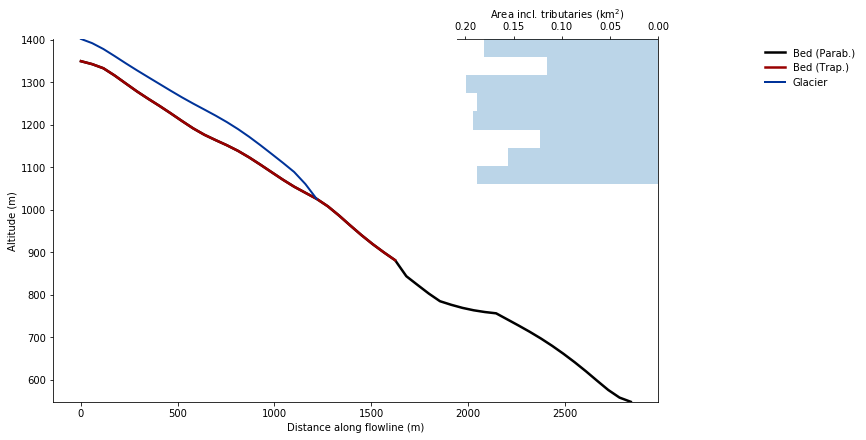

In [36]:
commit_model.run_until(100)
graphics.plot_modeloutput_section(gdirs[glacier_num], model=commit_model)